# OPTIMISATIONS DISCRÈTES

## Projet – Knapsack Problem

### Pi-12: n = 100

In [196]:
file_pi12_n100 = "pi-12-100-1000-001.kna"

def extract_data(file_path):
  with open(file_path, 'r') as f:
      content = f.readlines()
      profit = []
      weight = []
      for i in range(7, len(content)):
        profit.append(content[i].split(" ")[1])
        weight.append(content[i].split(" ")[2].split("\n")[0])
  return profit, weight

In [197]:
profits_pi12_n100, weights_pi12_n100 = extract_data(file_pi12_n100)
profits_pi12_n100 = [int(i) for i in profits_pi12_n100]
weights_pi12_n100 = [int(i) for i in weights_pi12_n100]
print(profits_pi12_n100)
print(weights_pi12_n100)

[582, 194, 679, 485, 312, 873, 468, 208, 364, 260, 582, 388, 291, 104, 520, 416, 970, 260, 582, 364, 776, 194, 468, 970, 312, 260, 156, 485, 416, 364, 582, 388, 468, 679, 52, 156, 312, 520, 52, 520, 468, 260, 468, 582, 388, 291, 468, 485, 312, 104, 468, 194, 97, 776, 388, 468, 416, 104, 104, 582, 485, 208, 388, 520, 104, 260, 364, 582, 468, 260, 208, 156, 679, 679, 97, 582, 97, 156, 679, 520, 208, 291, 776, 52, 291, 468, 156, 520, 468, 52, 873, 194, 520, 873, 873, 104, 873, 416, 776, 312]
[582, 194, 679, 485, 396, 873, 594, 264, 462, 330, 582, 388, 291, 132, 660, 528, 970, 330, 582, 462, 776, 194, 594, 970, 396, 330, 198, 485, 528, 462, 582, 388, 594, 679, 66, 198, 396, 660, 66, 660, 594, 330, 594, 582, 388, 291, 594, 485, 396, 132, 594, 194, 97, 776, 388, 594, 528, 132, 132, 582, 485, 264, 388, 660, 132, 330, 462, 582, 594, 330, 264, 198, 679, 679, 97, 582, 97, 198, 679, 660, 264, 291, 776, 66, 291, 594, 198, 660, 594, 66, 873, 194, 660, 873, 873, 132, 873, 528, 776, 396]


In [198]:
def extract_info(file_path):
  with open(file_path, 'r') as f:
      content = f.readlines()
      content_line4 = content[3].split("NB_ITEMS: ")
      nb_items = content_line4[1].split("\n")[0]
      content_line5 = content[4].split("MAX_CAPACITY: ")
      max_capacity = content_line5[1].split("\n")[0]
      max_capacity = int(max_capacity)


  return int(nb_items), int(max_capacity)

In [199]:
nb_items_pi12_n100, max_capacity_pi12_n100 = extract_info(file_pi12_n100)
print(nb_items_pi12_n100)
print(max_capacity_pi12_n100)

100
970


In [200]:
def calculate_profit(
    solution: str,
    profits: list
  ):

  profit = 0
  for i in range(len(solution)):
    if solution[i] == "1":
      profit += int(profits[i])

  return profit

In [201]:
def calculate_weight(
    solution: str,
    weights: list
  ):

  weight = 0
  for i in range(len(solution)):
    if solution[i] == "1":
      weight += int(weights[i])

  return weight

#### Création d'une solution valide (pas forcément optimale):
-->Ajouter des items aléatoirement dans le sac à dos jusqu'à arriver au poids maximal.

In [202]:
import random

def gen_valid_solution(max_capacity, weights, nb_items):
    sol = []  # Liste pour stocker la solution binaire
    current_capacity = 0

    for i in range(nb_items):
        if current_capacity >= max_capacity:
            sol.append("0")  # Si on atteint la limite, on met "0"
        else:
            bit = random.choice(["0", "1"])
            if bit == "1" and current_capacity + weights[i] > max_capacity:
                bit = "0"  # On force un "0" si ajouter 1 dépasse la capacité
            sol.append(bit)
            if bit == "1":
                current_capacity += weights[i]  # Mise à jour du poids

    return "".join(sol)


In [203]:
print("Poids à ne pas dépasser: ",max_capacity_pi12_n100)
a_solution = gen_valid_solution(max_capacity_pi12_n100, weights_pi12_n100, nb_items_pi12_n100)
print("Une solution valide est: ", a_solution)
print("Le profit de cette solution est: ", calculate_profit(a_solution, profits_pi12_n100))
print("Le poids total de cette solution est: ", calculate_weight(a_solution, weights_pi12_n100))

Poids à ne pas dépasser:  970
Une solution valide est:  0100001000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Le profit de cette solution est:  766
Le poids total de cette solution est:  920


#### La solution optimale avec un solver

In [11]:
!pip -q install ortools

In [204]:
from ortools.linear_solver import pywraplp
import numpy as np
import time

def solve_knapsack(profits, weights, capacity_max):

    solver = pywraplp.Solver.CreateSolver('SCIP')
    if not solver:
        print("Solveur non disponible.")
        return None, None

    n = len(profits)

    x = [solver.BoolVar(f'x_{i}') for i in range(n)]

    # Ajout de la contrainte de capacité
    solver.Add(solver.Sum(weights[i] * x[i] for i in range(n)) <= capacity_max)

    # Définition de la fonction objectif : Maximiser le profit total
    solver.Maximize(solver.Sum(profits[i] * x[i] for i in range(n)))

    # Résolution du problème
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        # Extraction de la solution optimale
        best_solution = [int(x[i].solution_value()) for i in range(n)]
        best_profit = solver.Objective().Value()
        return best_solution, best_profit
    else:
        print("Aucune solution optimale trouvée.")
        return None, None
time1 = time.time()

best_solution, best_profit = solve_knapsack(profits_pi12_n100, weights_pi12_n100, max_capacity_pi12_n100)

target_profit = best_profit
target_weight = sum(weights_pi12_n100[i] for i in range(len(best_solution)) if best_solution[i] == 1)
if best_solution:
    print("Meilleure solution trouvée :", best_solution)
    print("Meilleur profit :", target_profit)
    print("Poids atteint :", target_weight)


indice = np.where(np.array(best_solution) == 1)[0]
print(indice)
time2 = time.time()
temps_solver = []
temps_exec100 = time2 - time1
print("Temps d'exécution : ", temps_exec100)
temps_solver.append(temps_exec100)
print(temps_solver)

Meilleure solution trouvée : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Meilleur profit : 970.0
Poids atteint : 970
[16]
Temps d'exécution :  0.0072896480560302734
[0.0072896480560302734]


In [205]:
best_solution_str = "".join(map(str, best_solution))
print("Meilleure solution trouvée (en string):", best_solution_str)

Meilleure solution trouvée (en string): 0000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000


#### Métaheuristique 1 - Recuit simulé

In [206]:
#Méthode de voisinage - Transformation locale (p. 98 du cours)
def generate_single_neighbor(current_solution: str):
    neighbor = list(current_solution)
    index = random.randint(0, len(current_solution) - 1)
    neighbor[index] = '1' if neighbor[index] == '0' else '0'

    return ''.join(neighbor)

In [207]:
import numpy as np
import random
import matplotlib.pyplot as plt

def simulated_annealing(
    initial_solution: str,
    max_capacity: int,
    profits: list,
    weights: list,
    temperature: float,
    cooling_rate: float,
):
    current_solution = initial_solution
    current_profit = calculate_profit(current_solution, profits)
    current_weight = calculate_weight(current_solution, weights)

    best_solution = current_solution
    best_profit = current_profit

    iteration = 0

    # Listes pour stocker les valeurs à chaque itération
    profits_list = []
    weights_list = []

    while temperature > 1:
        iteration += 1

        # Générer un voisin valide (ne dépassant pas max_capacity)
        while True:
            neighbor = generate_single_neighbor(current_solution)
            neighbor_profit = calculate_profit(neighbor, profits)
            neighbor_weight = calculate_weight(neighbor, weights)

            if neighbor_weight <= max_capacity:
                break  # On garde ce voisin valide

        delta = neighbor_profit - current_profit

        if delta > 0:
            current_solution = neighbor
            current_profit = neighbor_profit
            if neighbor_profit > best_profit:
                best_solution = neighbor
                best_profit = neighbor_profit
        else:
            probability = np.exp(delta / temperature)
            if random.uniform(0, 1) < probability:
                current_solution = neighbor
                current_profit = neighbor_profit

        # Ajouter les valeurs actuelles de profit et poids dans les listes
        profits_list.append(current_profit)
        weights_list.append(current_weight)

        # Réduction progressive de la température
        temperature *= cooling_rate

    # Tracer l'évolution du profit et du poids
    plt.figure(figsize=(12, 6))

    # Tracer du profit au fil des itérations
    plt.subplot(1, 2, 1)
    plt.plot(profits_list, label='Profit', color='blue')
    plt.title('Évolution du profit au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Profit')
    plt.grid(True)

    # Tracer du poids au fil des itérations
    plt.subplot(1, 2, 2)
    plt.plot(weights_list, label='Poids', color='red')
    plt.title('Évolution du poids au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Poids')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return best_solution, best_profit, iteration


Poids à ne pas dépasser: 970
Solution initiale choisie aléatoirement:  1000000100000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000
Son profit actuel: 842
Son poids actuel: 912



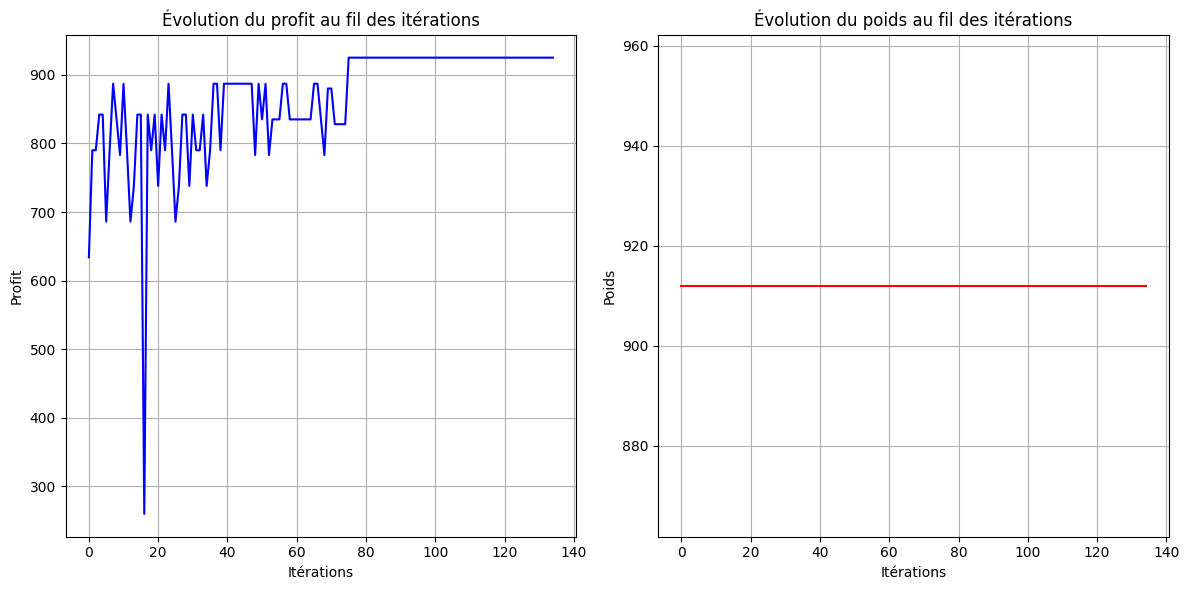

Meilleure solution trouvée : 0000000000000000000000000000000000000010000000000000100000000000000000000011100000000000000000000000
Meilleur profit : 925
Poids atteind : 939
Solution trouvée en 135 itérations


In [208]:
# Test de notre fonction de recuit simulé

print("Poids à ne pas dépasser:", max_capacity_pi12_n100)
initial_solution = gen_valid_solution(max_capacity_pi12_n100, weights_pi12_n100, nb_items_pi12_n100)

print("Solution initiale choisie aléatoirement: ",initial_solution)
print("Son profit actuel:",calculate_profit(initial_solution, profits_pi12_n100))
print("Son poids actuel:",calculate_weight(initial_solution, weights_pi12_n100))
print()

temperature = 1000
cooling_rate = 0.95

best_sol, best_prof, iterations = simulated_annealing(initial_solution, max_capacity_pi12_n100, profits_pi12_n100, weights_pi12_n100, temperature, cooling_rate)
print("Meilleure solution trouvée :", best_sol)
print("Meilleur profit :", best_prof)
print("Poids atteind :", calculate_weight(best_sol, weights_pi12_n100))
print(f"Solution trouvée en {iterations} itérations")


#### Tests


In [209]:
import pandas as pd
import time

def test_recuit_simule(temperature, cooling_rate, max_capacity, profits, weights, nb_items):
    results = []

    # Générer une solution initiale valide
    initial_solution = gen_valid_solution(max_capacity, weights, nb_items)
    initial_profit = calculate_profit(initial_solution, profits)
    initial_weight = calculate_weight(initial_solution, weights)

    # Démarrer le chronomètre
    start_time = time.time()

    # Appliquer le recuit simulé
    best_solution, best_profit, iterations = simulated_annealing(
        initial_solution, max_capacity, profits, weights, temperature, cooling_rate
    )

    # Arrêter le chronomètre
    end_time = time.time()
    execution_time = end_time - start_time  # Temps en secondes

    best_weight = calculate_weight(best_solution, weights)
    nb_objects = sum(1 for i in range(len(best_solution)) if best_solution[i] == "1")

    # Enregistrement des résultats
    results.append({
        "Solution initiale": initial_solution,
        "Profit initial": initial_profit,
        "Poids initial": initial_weight,
        "Temperature": temperature,
        "Cooling Rate": cooling_rate,
        "Nouvelle solution": best_solution,
        "Nouveau profit": best_profit,
        "Nouveau Poids": best_weight,
        "Nb Itérations": iterations,
        "Nb objets": nb_objects,
        "Temps (s)": execution_time
    })

    # Convertir en DataFrame pandas
    df = pd.DataFrame(results)

    return df

In [210]:
# Fixer un interval pour les paramètres
temperatures = [100, 200, 500, 700, 1000, 2000, 5000, 7000, 10000]
cooling_rates = [round(0.85 + i * 0.01, 2) for i in range(15)] # pour [0.85, 0.86, ..., 0.99]

'''for temperature in temperatures:
    for cooling_rate in cooling_rates:
        print(f"Temp {temperature}\nCooling rate {cooling_rate}")
        test = test_recuit_simule(temperature, cooling_rate, max_capacity_pi12_n100, profits_pi12_n100, weights_pi12_n100, nb_items_pi12_n100)
        test.to_csv(f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule{nb_items_pi12_n100}_12.csv", index=False)
'''

'for temperature in temperatures:\n    for cooling_rate in cooling_rates:\n        print(f"Temp {temperature}\nCooling rate {cooling_rate}")\n        test = test_recuit_simule(temperature, cooling_rate, max_capacity_pi12_n100, profits_pi12_n100, weights_pi12_n100, nb_items_pi12_n100)\n        test.to_csv(f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule{nb_items_pi12_n100}_12.csv", index=False)\n'

#### Graphiques

In [19]:
!pip install -q matplotlib

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_profit_from_temp(temperatures, cooling_rates):
    max_profits = {}

    for temperature in temperatures:
        max_profit = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_profit = max(max_profit, df["Nouveau profit"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_profits[temperature] = max_profit

    return max_profits


In [212]:
import pandas as pd
import os

def extract_max_profit_from_CR(temperatures, cooling_rates):
    max_profits = {}

    for cooling_rate in cooling_rates:
        max_profit = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nouveau profit"].max()
                max_profit = max(max_profit, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        max_profits[cooling_rate] = max_profit if max_profit != float('-inf') else None

    return max_profits


In [213]:
max_profits_temp = extract_max_profit_from_temp(temperatures, cooling_rates)
print(max_profits_temp)

{100: np.int64(970), 200: np.int64(970), 500: np.int64(970), 700: np.int64(970), 1000: np.int64(970), 2000: np.int64(970), 5000: np.int64(970), 7000: np.int64(970), 10000: np.int64(970)}


In [214]:
max_profits_CR = extract_max_profit_from_CR(temperatures, cooling_rates)
print(max_profits_CR)

{0.85: np.int64(970), 0.86: np.int64(970), 0.87: np.int64(970), 0.88: np.int64(970), 0.89: np.int64(970), 0.9: np.int64(970), 0.91: np.int64(970), 0.92: np.int64(970), 0.93: np.int64(970), 0.94: np.int64(970), 0.95: np.int64(970), 0.96: np.int64(970), 0.97: np.int64(970), 0.98: np.int64(970), 0.99: np.int64(970)}


In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_min_weight_from_temp(temperatures, cooling_rates):
    min_weights = {}

    for temperature in temperatures:
        min_weight = float('inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                min_weight = min(min_weight, df["Nouveau Poids"].min())
            else:
                print(f"Warning: File {file_name} not found.")

        min_weights[temperature] = min_weight

    return min_weights

In [216]:
def extract_min_weight_from_CR(temperatures, cooling_rates):
    min_weights = {}

    for cooling_rate in cooling_rates:
        min_weight = float('inf')

        for temperature in temperatures:
            filename = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(filename):
                df = pd.read_csv(filename)
                min_weight = min(min_weight, df["Nouveau Poids"].min())
            else:
                print(f"Fichier manquant: {filename}")

        min_weights[cooling_rate] = min_weight

    return min_weights


In [217]:
min_weights_temp = extract_min_weight_from_temp(temperatures, cooling_rates)
print(min_weights_temp)

{100: np.int64(908), 200: np.int64(908), 500: np.int64(908), 700: np.int64(939), 1000: np.int64(912), 2000: np.int64(939), 5000: np.int64(939), 7000: np.int64(908), 10000: np.int64(908)}


In [218]:
min_weights_CR = extract_min_weight_from_CR(temperatures, cooling_rates)
print(min_weights_CR)

{0.85: np.int64(908), 0.86: np.int64(912), 0.87: np.int64(908), 0.88: np.int64(939), 0.89: np.int64(908), 0.9: np.int64(908), 0.91: np.int64(912), 0.92: np.int64(912), 0.93: np.int64(908), 0.94: np.int64(908), 0.95: np.int64(939), 0.96: np.int64(908), 0.97: np.int64(943), 0.98: np.int64(939), 0.99: np.int64(939)}


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_min_object_from_temp(temperatures, cooling_rates):
    min_objects = {}

    for temperature in temperatures:
        min_object = float('inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                min_object = min(min_object, df["Nb objets"].min())
            else:
                print(f"Fichier manquant: {file_name}")

        min_objects[temperature] = min_object

    return min_objects

In [29]:
import pandas as pd
import os

def extract_min_object_from_CR(temperatures, cooling_rates):
    min_objects = {}

    for cooling_rate in cooling_rates:
        min_object = float('inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_min = df["Nb objets"].min()
                min_object = min(min_object, current_min)
            else:
                print(f"Fichier manquant: {file_name}")

        if min_object != float('inf'):
            min_objects[cooling_rate] = min_object
        else:
            min_objects[cooling_rate] = None

    return min_objects


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_object_from_temp(temperatures, cooling_rates):
    max_objects = {}

    for temperature in temperatures:
        max_object = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_object = max(max_object, df["Nb objets"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_objects[temperature] = max_object

    return max_objects

In [31]:
import pandas as pd
import os

def extract_max_object_from_CR(temperatures, cooling_rates):
    max_objects = {}

    for cooling_rate in cooling_rates:
        max_object = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nb objets"].max()
                max_object = max(max_object, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_object != float('-inf'):
            max_objects[cooling_rate] = max_object
        else:
            max_objects[cooling_rate] = None

    return max_objects


In [32]:
max_objects_temp = extract_max_object_from_temp(temperatures, cooling_rates)
print(max_objects_temp)
min_objects_temp = extract_min_object_from_temp(temperatures, cooling_rates)
print(min_objects_temp)

{100: np.int64(4), 200: np.int64(5), 500: np.int64(7), 700: np.int64(5), 1000: np.int64(8), 2000: np.int64(6), 5000: np.int64(6), 7000: np.int64(8), 10000: np.int64(6)}
{100: np.int64(2), 200: np.int64(2), 500: np.int64(2), 700: np.int64(2), 1000: np.int64(2), 2000: np.int64(2), 5000: np.int64(2), 7000: np.int64(2), 10000: np.int64(2)}


In [33]:
max_objects_CR = extract_max_object_from_CR(temperatures, cooling_rates)
print(max_objects_CR)
min_objects_CR = extract_min_object_from_CR(temperatures, cooling_rates)
print(min_objects_CR)

{0.85: np.int64(4), 0.86: np.int64(6), 0.87: np.int64(4), 0.88: np.int64(4), 0.89: np.int64(5), 0.9: np.int64(4), 0.91: np.int64(6), 0.92: np.int64(5), 0.93: np.int64(6), 0.94: np.int64(4), 0.95: np.int64(6), 0.96: np.int64(6), 0.97: np.int64(5), 0.98: np.int64(8), 0.99: np.int64(7)}
{0.85: np.int64(2), 0.86: np.int64(2), 0.87: np.int64(2), 0.88: np.int64(2), 0.89: np.int64(2), 0.9: np.int64(2), 0.91: np.int64(2), 0.92: np.int64(2), 0.93: np.int64(2), 0.94: np.int64(2), 0.95: np.int64(2), 0.96: np.int64(2), 0.97: np.int64(2), 0.98: np.int64(2), 0.99: np.int64(2)}


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_iterations_from_temp(temperatures, cooling_rates):
    max_iterations = {}

    for temperature in temperatures:
        max_iteration = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_iteration = max(max_iteration, df["Nb Itérations"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_iterations[temperature] = max_iteration

    return max_iterations

In [35]:
import pandas as pd
import os

def extract_max_iterations_from_CR(temperatures, cooling_rates):
    max_iterations = {}

    for cooling_rate in cooling_rates:
        max_iteration = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nb Itérations"].max()
                max_iteration = max(max_iteration, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_iteration != float('-inf'):
            max_iterations[cooling_rate] = max_iteration
        else:
            max_iterations[cooling_rate] = None

    return max_iterations


In [36]:
max_iterations_temp = extract_max_iterations_from_temp(temperatures, cooling_rates)
print(max_iterations_temp)

{100: np.int64(459), 200: np.int64(528), 500: np.int64(619), 700: np.int64(652), 1000: np.int64(688), 2000: np.int64(757), 5000: np.int64(848), 7000: np.int64(881), 10000: np.int64(917)}


In [37]:
max_iterations_CR = extract_max_iterations_from_CR(temperatures, cooling_rates)
print(max_iterations_CR)

{0.85: np.int64(57), 0.86: np.int64(62), 0.87: np.int64(67), 0.88: np.int64(73), 0.89: np.int64(80), 0.9: np.int64(88), 0.91: np.int64(98), 0.92: np.int64(111), 0.93: np.int64(127), 0.94: np.int64(149), 0.95: np.int64(180), 0.96: np.int64(226), 0.97: np.int64(303), 0.98: np.int64(456), 0.99: np.int64(917)}


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_time_from_temp(temperatures, cooling_rates):
    max_times = {}

    for temperature in temperatures:
        max_time = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_time = max(max_time, df["Temps (s)"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_times[temperature] = max_time

    return max_times

In [39]:
import pandas as pd
import os

def extract_max_time_from_CR(temperatures, cooling_rates):
    max_times = {}

    for cooling_rate in cooling_rates:
        max_time = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Temps (s)"].max()
                max_time = max(max_time, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_time != float('-inf'):
            max_times[cooling_rate] = max_time
        else:
            max_times[cooling_rate] = None

    return max_times


In [40]:
max_time_temp = extract_max_time_from_temp(temperatures, cooling_rates)
print(max_time_temp)

{100: np.float64(0.798600435256958), 200: np.float64(1.046863079071045), 500: np.float64(0.8438851833343506), 700: np.float64(1.029721736907959), 1000: np.float64(0.7897870540618896), 2000: np.float64(0.8683440685272217), 5000: np.float64(0.9173123836517334), 7000: np.float64(0.7855978012084961), 10000: np.float64(0.8044326305389404)}


In [41]:
max_time_CR = extract_max_time_from_CR(temperatures, cooling_rates)
print(max_time_CR)

{0.85: np.float64(0.7897870540618896), 0.86: np.float64(0.7459976673126221), 0.87: np.float64(0.755164623260498), 0.88: np.float64(0.6499466896057129), 0.89: np.float64(0.7413463592529297), 0.9: np.float64(0.7446296215057373), 0.91: np.float64(0.6912832260131836), 0.92: np.float64(0.6670680046081543), 0.93: np.float64(0.7720670700073242), 0.94: np.float64(0.7893502712249756), 0.95: np.float64(0.7855978012084961), 0.96: np.float64(0.7500300407409668), 0.97: np.float64(0.7896938323974609), 0.98: np.float64(0.8438851833343506), 0.99: np.float64(1.046863079071045)}


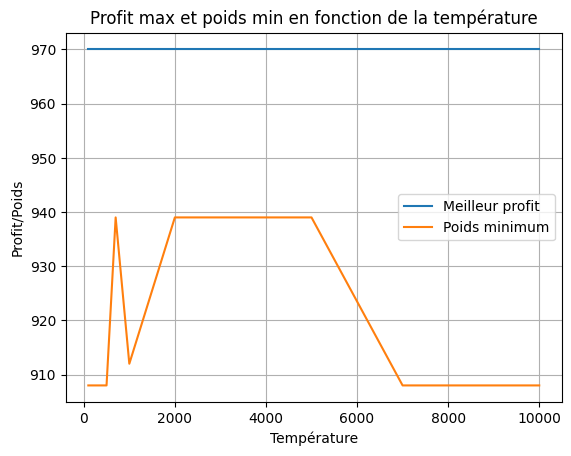

In [219]:
x = temperatures
y1 = [max_profits_temp[temp] for temp in temperatures]
y2 = [min_weights_temp[temp] for temp in temperatures]

plt.plot(x, y1, label='Meilleur profit')
plt.plot(x, y2, label='Poids minimum')
plt.xlabel('Température')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de la température')
plt.legend()
plt.grid()
plt.show()

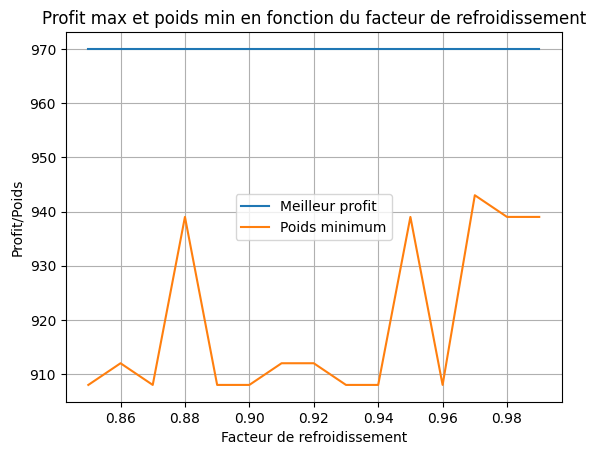

In [220]:
z = cooling_rates
z1 = [max_profits_CR[cr] for cr in cooling_rates]
z2 = [min_weights_CR[cr] for cr in cooling_rates]

plt.plot(z, z1, label='Meilleur profit')
plt.plot(z, z2, label='Poids minimum')
plt.xlabel('Facteur de refroidissement')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction du facteur de refroidissement')
plt.legend()
plt.grid()
plt.show()

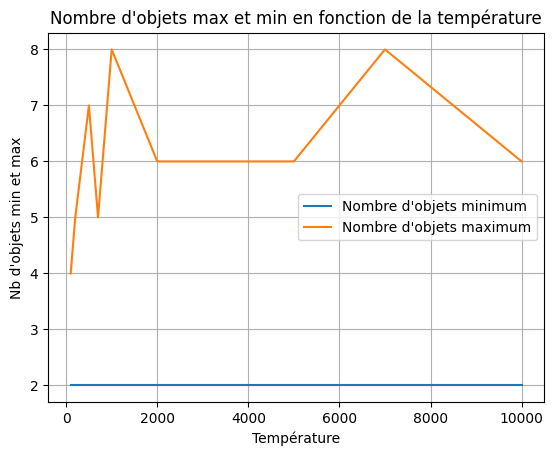

In [44]:
y3 = [min_objects_temp[temp] for temp in temperatures]
y4 = [max_objects_temp[temp] for temp in temperatures]

plt.plot(x, y3, label='Nombre d\'objets minimum')
plt.plot(x, y4, label='Nombre d\'objets maximum')
plt.title("Nombre d'objets max et min en fonction de la température")
plt.xlabel('Température')
plt.ylabel("Nb d'objets min et max")
plt.legend()
plt.grid()
plt.show()

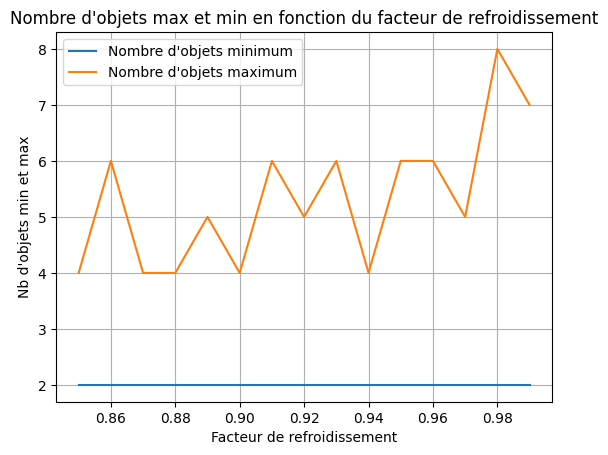

In [45]:
z3 = [min_objects_CR[cr] for cr in cooling_rates]
z4 = [max_objects_CR[cr] for cr in cooling_rates]

plt.plot(z, z3, label='Nombre d\'objets minimum')
plt.plot(z, z4, label='Nombre d\'objets maximum')
plt.title("Nombre d'objets max et min en fonction du facteur de refroidissement")
plt.xlabel('Facteur de refroidissement')
plt.ylabel("Nb d'objets min et max")
plt.legend()
plt.grid()
plt.show()

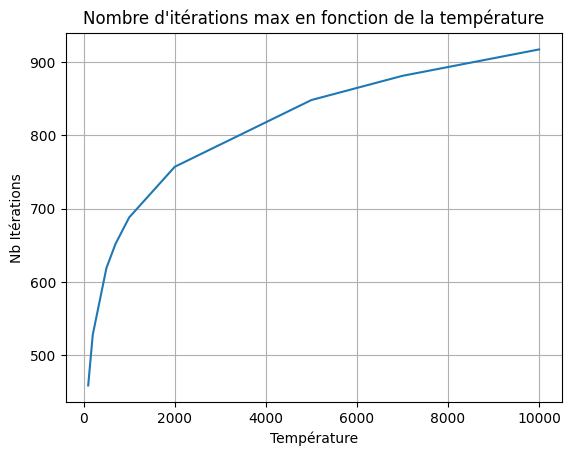

In [46]:
y5 = [max_iterations_temp[temp] for temp in temperatures]

plt.plot(x, y5, label='Nombre d\'itérations maximum')
plt.title('Nombre d\'itérations max en fonction de la température')
plt.xlabel('Température')
plt.ylabel('Nb Itérations')
plt.grid()
plt.show()

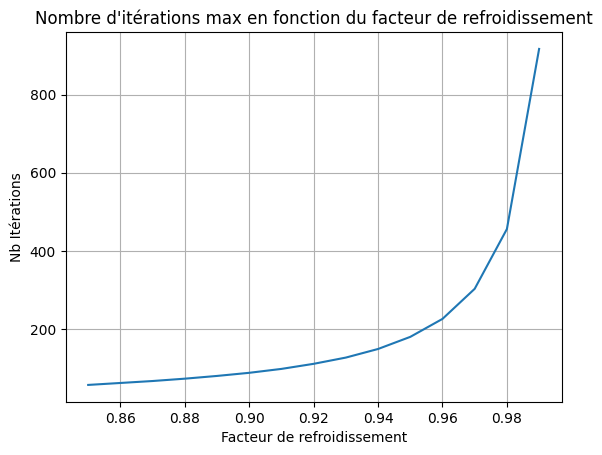

In [47]:
z5 = [max_iterations_CR[cr] for cr in cooling_rates]

plt.plot(z, z5, label='Nombre d\'itérations maximum')
plt.title('Nombre d\'itérations max en fonction du facteur de refroidissement')
plt.xlabel('Facteur de refroidissement')
plt.ylabel('Nb Itérations')
plt.grid()
plt.show()

In [48]:
!pip install -q seaborn statsmodels

     Température    CR  Profit max
0            100  0.85         887
1            100  0.86         887
2            100  0.87         887
3            100  0.88         887
4            100  0.89         887
..           ...   ...         ...
130        10000  0.95         887
131        10000  0.96         887
132        10000  0.97         887
133        10000  0.98         887
134        10000  0.99         887

[135 rows x 3 columns]
                            OLS Regression Results                            
Dep. Variable:             Profit max   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -66.00
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               1.00
Time:                        15:08:54   Log-Likelihood:                 3514.6
No. Observations:                 135   AIC:                            -7023.
Df 

c:\Users\cerik\OneDrive\Desktop\4A INFO\Projet Knapsack\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


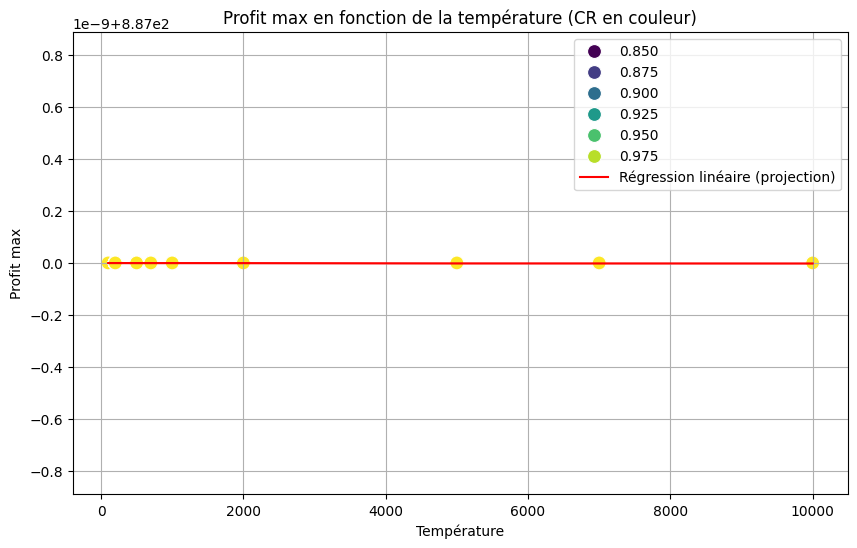

In [112]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

def collecter_donnees_recuit(temp_list, cr_list, n, fichier):
    donnees = []

    for temp in temp_list:
        for cr in cr_list:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule{n}_{fichier}.csv"
            
            if os.path.exists(file_name):
                try:
                    df = pd.read_csv(file_name)
                    if 'Nouveau profit' in df.columns:
                        profit = df['Nouveau profit'].iloc[0]
                        donnees.append({
                            "Température": temp,
                            "CR": cr,
                            "Profit max": profit
                        })
                    else:
                        print(f"'profit_final' manquant dans {file_name}")
                except Exception as e:
                    print(f"Erreur de lecture {file_name} : {e}")
            else:
                print(f"Fichier introuvable : {file_name}")

    return pd.DataFrame(donnees)

data_pi12_n100 = collecter_donnees_recuit(temperatures, cooling_rates, 100, 12)
print(data_pi12_n100)

def tracer_regression_lineaire(df):
    X = df[["Température", "CR"]]
    y = df["Profit max"]

    X = sm.add_constant(X)

    # Régression linéaire
    model = sm.OLS(y, X).fit()
    print(model.summary())

    # Extraction des coefficients
    a = model.params["Température"]
    b = model.params["CR"]
    c = model.params["const"]

    print(f"L'équation de régression linéaire est : Profit max = {a:.4f} * Température + {b:.4f} * CR + {c:.4f}")

    y_pred = model.predict(X)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x="Température", y="Profit max", hue="CR", palette="viridis", s=100)
    sns.lineplot(x=df["Température"], y=y_pred, color="red", label="Régression linéaire (projection)")
    plt.title("Profit max en fonction de la température (CR en couleur)")
    plt.legend()
    plt.grid()
    plt.show()

tracer_regression_lineaire(data_pi12_n100)


In [55]:
import os
import pandas as pd

def find_optimal_solution(temperatures, cooling_rates, optimal_solution):
    filenames = []
    for temp in temperatures:
        for cr in cooling_rates:
            filename = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"
            if os.path.exists(filename):
                try:
                    df = pd.read_csv(filename)
                    if "Nouvelle solution" in df.columns:
                        if optimal_solution in df["Nouvelle solution"].values:
                            filenames.append(filename)
                except pd.errors.ParserError:
                    print(f"Warning: Could not parse file {filename}. Skipping.")
    return filenames

In [165]:
def find_files_with_profit_and_weight(target_profit, target_weight, dossier="Resultats"):
    filenames = []
    for filename in os.listdir(dossier):
        if filename.startswith("Temp") and filename.endswith("100_12.csv"):
            full_path = os.path.join(dossier, filename)
            try:
                df = pd.read_csv(full_path)
                if 'Nouveau profit' in df.columns and 'Nouveau Poids' in df.columns:
                    match = (df['Nouveau profit'] == target_profit) & (df['Nouveau Poids'] == target_weight)
                    if any(match):
                        filenames.append(filename)
            except pd.errors.ParserError:
                print(f"Fichier {filename} non retrouve.")
    return filenames


In [166]:
fichier_optimal = find_optimal_solution(temperatures, cooling_rates, best_solution_str)

if len(fichier_optimal) == 0:
    print("Le recuit simulé n'a pas abouti à la solution optimale en termes de choix/répartition d'objets.")
else:
    for f in fichier_optimal:
        print(f)

Le recuit simulé n'a pas abouti à la solution optimale en termes de choix/répartition d'objets.


In [167]:
found_files = find_files_with_profit_and_weight(target_profit, target_weight)
for f in found_files:
  print(f)

A éxecuter uniquement si le recuit simulé a pu donner la solution optimale 

In [71]:
import pandas as pd

def analyze_files(found_files, dossier="Resultats"):
    temp_counts = {}
    cr_counts = {}

    for file in found_files:
        filepath = os.path.join(dossier, file)
        try:
            df = pd.read_csv(filepath)

            # Extraction des paramètres depuis le nom du fichier
            parts = file.split("_")

            try:
                temp_str = parts[0].replace("Temp", "")
                cr_str = parts[1].replace("CR", "").split("resultats")[0]

                temp_counts[int(temp_str)] = temp_counts.get(int(temp_str), 0) + 1
                cr_counts[float(cr_str)] = cr_counts.get(float(cr_str), 0) + 1

            except (IndexError, ValueError) as e:
                print(f"Erreur lors de l'extraction des paramètres depuis {file} : {e}")

        except Exception as e:
            print(f"Erreur avec le fichier {file} : {e}")

    return temp_counts, cr_counts

In [72]:
temp_dict, cr_dict = analyze_files(found_files)

print("Temperature counts:", temp_dict)
print("Cooling rate counts:", cr_dict)

max_temps = max(temp_dict, key=temp_dict.get)
print("La température optimale est:", max_temps)
max_crs = max(cr_dict, key=cr_dict.get)
print("Le facteur de refroidissement optimal est:", max_crs)

Temperature counts: {10000: 4, 1000: 4, 100: 6, 2000: 6, 200: 8, 5000: 8, 500: 7, 7000: 5, 700: 8}
Cooling rate counts: {0.87: 3, 0.93: 6, 0.95: 5, 0.98: 4, 0.89: 6, 0.94: 3, 0.97: 6, 0.85: 3, 0.86: 5, 0.88: 5, 0.99: 2, 0.92: 2, 0.9: 3, 0.91: 2, 0.96: 1}
La température optimale est: 200
Le facteur de refroidissement optimal est: 0.93


#### Métaheuristique 2 - Génétique

In [14]:
def roulette_selection(population, profits):
    # Calcul du profit total pour la population
    fitness = [calculate_profit(sol, profits) for sol in population]
    total_fitness = sum(fitness)

    # Si la fitness totale est 0, on retourne un choix aléatoire
    if total_fitness == 0:
        return random.choice(population)

    # Sélection d'un parent par roulette
    pick = random.uniform(0, total_fitness)
    current = 0
    for i, sol in enumerate(population):
        current += fitness[i]
        if current > pick:
            return sol
    return population[-1]  # Retourne le dernier si aucune sélection avant


In [15]:
def crossover(nb_items, parent1, parent2, max_capacity, weights):
    point = random.randint(1, nb_items - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]

    # Vérification si les enfants sont valides
    if calculate_weight(child1, weights) > max_capacity:
        child1 = parent1  # Si l'enfant dépasse la capacité, on garde le parent
    if calculate_weight(child2, weights) > max_capacity:
        child2 = parent2  # Idem pour l'autre enfant

    return child1, child2


In [16]:
def mutate(nb_items, max_capacity, weights, solution):
    sol_list = list(solution)
    index = random.randint(0, nb_items - 1)
    sol_list[index] = "1" if sol_list[index] == "0" else "0"

    # Vérification de la validité après mutation
    new_sol = "".join(sol_list)
    if calculate_weight(new_sol, weights) <= max_capacity:
        return new_sol  # Retourner la solution si elle respecte la capacité
    return solution  # Si la mutation rend la solution invalide, on garde l'ancienne solution


In [65]:
import matplotlib.pyplot as plt

def algo_genetique(
      nb_items: int,
      max_capacity: int,
      weights: list,
      profits: list,
      nbPop: int,
      nbGen: int,
      probaCross: float,
      nbBest: int
    ):

    # Initialisation de la population
    population = [gen_valid_solution(max_capacity, weights, nb_items) for _ in range(nbPop)]
    best_solution = max(population, key=lambda sol: calculate_profit(sol, profits))
    best_profit = calculate_profit(best_solution, profits)

    # Pour le graphique
    evolution_profits = []
    evolution_weights = []

    for generation in range(nbGen):
        new_population = []

        # Sélection et reproduction
        for _ in range(nbPop):
            parent1 = roulette_selection(population, profits)
            parent2 = roulette_selection(population, profits)

            # Croisement ou mutation
            if random.random() < probaCross:
                child1, child2 = crossover(nb_items, parent1, parent2, max_capacity, weights)
            else:
                child1 = mutate(nb_items, max_capacity, weights, parent1)
                child2 = mutate(nb_items, max_capacity, weights, parent2)

            new_population.append(child1)
            new_population.append(child2)

        # Garder les meilleures solutions
        population = sorted(new_population, key=lambda sol: calculate_profit(sol, profits), reverse=True)[:nbPop]

        # Meilleure solution actuelle
        current_best_solution = population[0]
        current_best_profit = calculate_profit(current_best_solution, profits)
        current_best_weight = calculate_weight(current_best_solution, weights)

        # Enregistrer l’évolution
        evolution_profits.append(current_best_profit)
        evolution_weights.append(current_best_weight)

        # Mettre à jour la meilleure globale
        if current_best_profit > best_profit:
            best_solution = current_best_solution
            best_profit = current_best_profit

    # Tracer l'évolution du profit et du poids
    plt.figure(figsize=(12, 6))

    # Tracer du profit au fil des itérations
    plt.subplot(1, 2, 1)
    plt.plot(evolution_profits, label='Profit', color='blue')
    plt.title('Évolution du profit au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Profit')
    plt.grid(True)

    # Tracer du poids au fil des itérations
    plt.subplot(1, 2, 2)
    plt.plot(evolution_weights, label='Poids', color='red')
    plt.title('Évolution du poids au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Poids')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return best_solution, best_profit


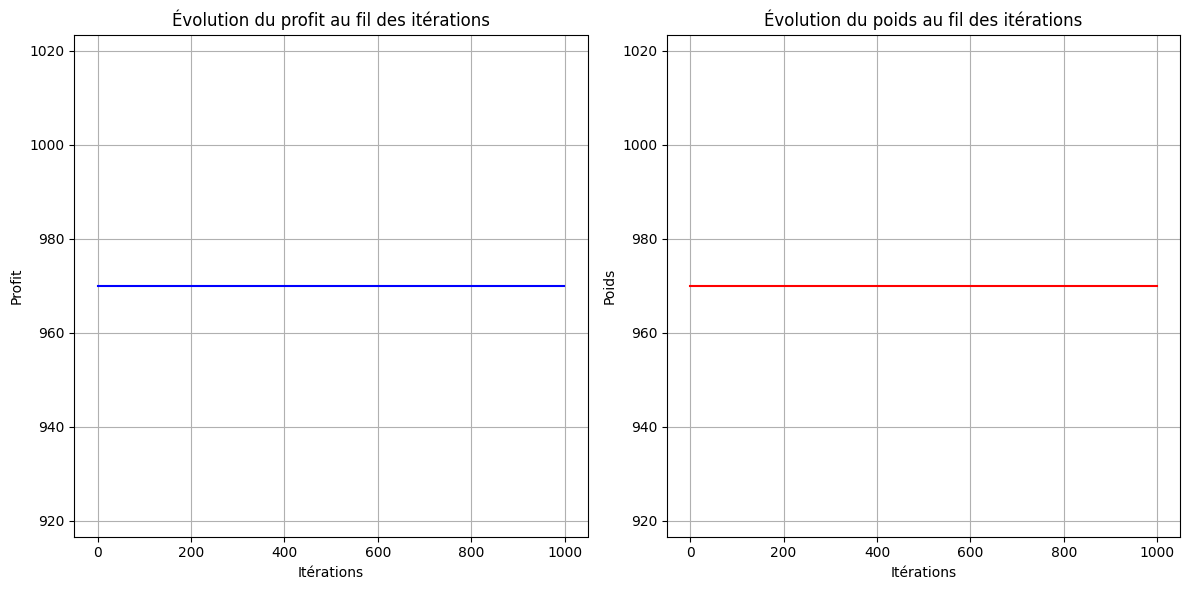

Meilleure solution trouvée : 1100000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000
Meilleur profit : 970
Poids atteind : 970


In [72]:
nbPop = 10  # Taille de la population
nbGen = 1000  # Nombre de générations
probaCross = 0.5  # Probabilité de croisement
nbBest = 2  # Nombre de meilleures solutions conservées

best_solution, best_profit = algo_genetique(nb_items_pi12_n100, max_capacity_pi12_n100, weights_pi12_n100, profits_pi12_n100, nbPop, nbGen, probaCross, nbBest)
print("Meilleure solution trouvée :", best_solution)
print("Meilleur profit :", best_profit)
print("Poids atteind :", calculate_weight(best_solution, weights_pi12_n100))

#### Tests

In [22]:
import pandas as pd
import time
import os

def test_algo_genetique(nb_items, max_capacity, weights, profits, nbPop, nbGen, probaCross, nbBest):
                    results = []
                    
                    # Générer une solution initiale valide
                    initial_solution = gen_valid_solution(max_capacity, weights, nb_items)
                    initial_profit = calculate_profit(initial_solution, profits)
                    initial_weight = calculate_weight(initial_solution, weights)

                    # Démarrer le chronomètre
                    start_time = time.time()

                    # Exécuter l'algorithme génétique
                    best_solution, best_profit = algo_genetique(
                        nb_items, max_capacity, weights, profits, nbPop, nbGen, probaCross, nbBest
                    )

                    # Arrêter le chronomètre
                    end_time = time.time()
                    execution_time = end_time - start_time  # Temps en secondes

                    # Calculer le poids et le nombre d'objets de la meilleure solution
                    best_weight = calculate_weight(best_solution, weights)
                    nb_objects = sum(1 for i in range(len(best_solution)) if best_solution[i] == "1")

                    # Enregistrement des résultats
                    results.append({
                        "Solution initiale": initial_solution,
                        "Profit initial": initial_profit,
                        "Poids initial": initial_weight,
                        "NbPop": nbPop,
                        "NbGen": nbGen,
                        "ProbaCross": probaCross,
                        "NbBest": nbBest,
                        "Nouvelle solution": best_solution,
                        "Nouveau profit": best_profit,
                        "Nouveau Poids": best_weight,
                        "Nb objets": nb_objects,
                        "Temps (s)": execution_time
                    })

                    # Convertir en DataFrame et sauvegarder le fichier
                    df = pd.DataFrame(results)
                    return df
                


In [28]:
# Fixer un interval pour les paramètres

nbPop_list = [10, 50, 70, 100]
nbGen_list = [10, 50, 70, 100]
probaCross_list = [0.1, 0.5, 0.9]
nbBest_list = [2, 5]

for nbPop in nbPop_list:
    for nbGen in nbGen_list:
        for probaCross in probaCross_list:
            for nbBest in nbBest_list:
                print(f"NbPop {nbPop}\nNbGen {nbGen}\nProbaCross {probaCross}\nNbBest {nbBest}")
                test = test_algo_genetique(nb_items_pi12_n100, max_capacity_pi12_n100, weights_pi12_n100, profits_pi12_n100, nbPop, nbGen, probaCross, nbBest)
                test.to_csv(f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique{nb_items_pi12_n100}_12.csv", index=False)


NbPop 10
NbGen 10
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 10
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 10
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 10
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 10
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 10
ProbaCross 0.9
NbBest 5
NbPop 10
NbGen 50
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 50
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 50
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 50
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 50
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 50
ProbaCross 0.9
NbBest 5
NbPop 10
NbGen 70
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 70
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 70
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 70
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 70
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 70
ProbaCross 0.9
NbBest 5
NbPop 10
NbGen 100
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 100
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 100
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 100
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 100
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 100
ProbaCross

In [29]:
def extract_max_profit_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for probaCross in probaCross_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[probaCross] = max_profit

    return max_profits

In [30]:
def extract_min_weight_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for probaCross in probaCross_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[probaCross] = min_weight

    return min_weights


In [31]:
max_profits_probaCross = extract_max_profit_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_probaCross)


{0.1: np.int64(970), 0.5: np.int64(970), 0.9: np.int64(970)}


In [32]:
min_weights_probaCross = extract_min_weight_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_probaCross)

{0.1: np.int64(939), 0.5: np.int64(970), 0.9: np.int64(939)}


In [34]:
def extract_max_profit_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbGen in nbGen_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbGen] = max_profit

    return max_profits


In [35]:
def extract_min_weight_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbGen in nbGen_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbGen] = min_weight

    return min_weights

In [36]:
max_profits_nbGen = extract_max_profit_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbGen)

{10: np.int64(970), 50: np.int64(970), 70: np.int64(970), 100: np.int64(970)}


In [37]:
min_weights_nbGen = extract_min_weight_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbGen)

{10: np.int64(939), 50: np.int64(943), 70: np.int64(939), 100: np.int64(939)}


In [38]:
def extract_max_profit_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbBest in nbBest_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for probaCross in probaCross_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbBest] = max_profit

    return max_profits

In [39]:
def extract_min_weight_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbBest in nbBest_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for probaCross in probaCross_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbBest] = min_weight

    return min_weights

In [46]:
max_profits_nbBest = extract_max_profit_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbBest)

{2: np.int64(970), 5: np.int64(970)}


In [47]:
min_weights_nbBest = extract_min_weight_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbBest)

{2: np.int64(939), 5: np.int64(939)}


In [42]:
def extract_max_profit_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbPop in nbPop_list:
        max_profit = float('-inf')

        for nbGen in nbGen_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbPop] = max_profit

    return max_profits

In [43]:
def extract_min_weight_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbPop in nbPop_list:
        min_weight = float('inf')

        for nbGen in nbGen_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbPop] = min_weight

    return min_weights

In [44]:
max_profits_nbPop = extract_max_profit_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbPop)

{10: np.int64(970), 50: np.int64(970), 70: np.int64(970), 100: np.int64(970)}


In [45]:
min_weights_nbPop = extract_min_weight_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbPop)

{10: np.int64(939), 50: np.int64(970), 70: np.int64(970), 100: np.int64(970)}


#### Graphiques

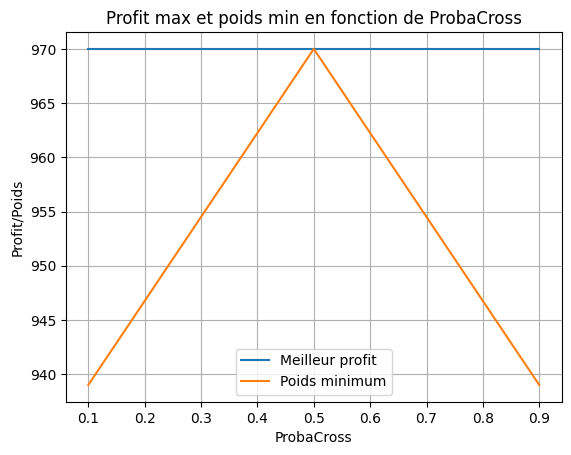

In [51]:
y = probaCross_list
y1 = [max_profits_probaCross[i] for i in y]
y2 = [min_weights_probaCross[i] for i in y]

plt.plot(y, y1, label='Meilleur profit')
plt.plot(y, y2, label='Poids minimum')
plt.xlabel('ProbaCross')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de ProbaCross')
plt.legend()
plt.grid()
plt.show()

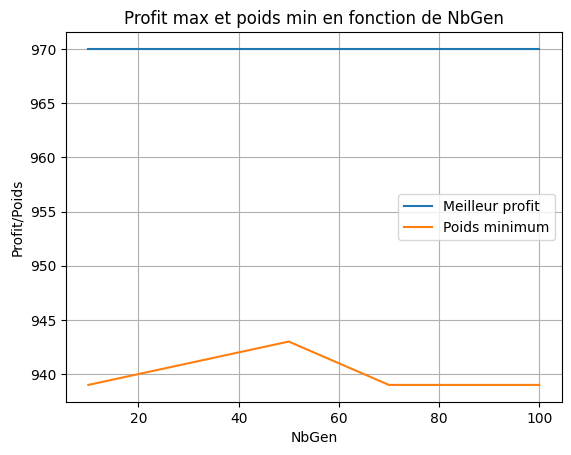

In [52]:
z = nbGen_list
z1 = [max_profits_nbGen[i] for i in z]
z2 = [min_weights_nbGen[i] for i in z]

plt.plot(z, z1, label='Meilleur profit')
plt.plot(z, z2, label='Poids minimum')
plt.xlabel('NbGen')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de NbGen')
plt.legend()
plt.grid()
plt.show()

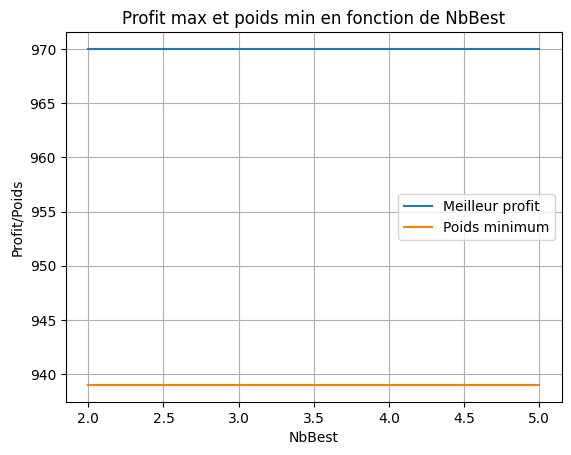

In [54]:
k = nbBest_list
k1 = [max_profits_nbBest[i] for i in k]
k2 = [min_weights_nbBest[i] for i in k]

plt.plot(k, k1, label='Meilleur profit')
plt.plot(k, k2, label='Poids minimum')
plt.xlabel('NbBest')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de NbBest')
plt.legend()
plt.grid()
plt.show()

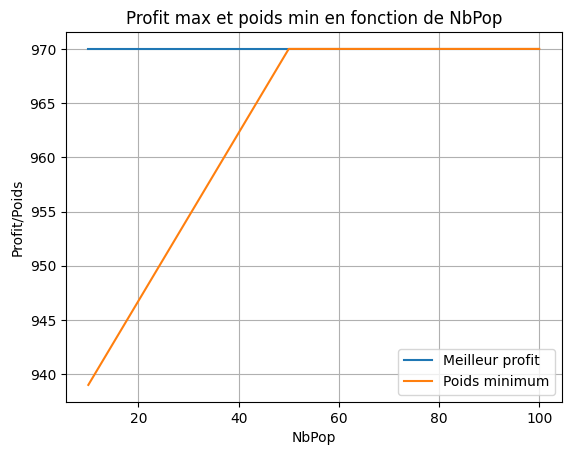

In [50]:
x = nbPop_list
x1 = [max_profits_nbPop[i] for i in x]
x2 = [min_weights_nbPop[i] for i in x]

plt.plot(x, x1, label='Meilleur profit')
plt.plot(x, x2, label='Poids minimum')
plt.xlabel('NbPop')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de NbPop')
plt.legend()
plt.grid()
plt.show()

In [73]:
def find_optimal_solution(nbPop_list, nbGen_list, probaCross_list, nbBest_list, optimal_solution):

    filenames = []
    for nbPop in nbPop_list:
        for nbGen in nbGen_list:
          for probaCross in probaCross_list:
            for nbBest in nbBest_list:
                filename = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100_12.csv"
                if os.path.exists(filename):
                    try:
                        df = pd.read_csv(filename)
                        if optimal_solution in df["Nouvelle solution"].values:
                            filenames.append(filename)
                    except pd.errors.ParserError:
                        print(f"Warning: Could not parse file {filename}. Skipping.")
                else:
                    print(f"Fichier manquant: {filename}")

    return filenames


In [ ]:
def find_files_with_profit_and_weight(target_profit, target_weight, dossier="Resultats"):
    filenames = []

    for filename in os.listdir(dossier):
        if filename.startswith("NbPop") and filename.endswith(".csv"):
            filepath = os.path.join(dossier, filename)
            try:
                df = pd.read_csv(filepath)

                if 'Nouveau profit' in df.columns and 'Nouveau Poids' in df.columns:
                    condition = (df['Nouveau profit'] == target_profit) & (df['Nouveau Poids'] == target_weight)
                    if any(condition):
                        filenames.append(filename)
            except Exception as e:
                print(f"Erreur avec le fichier {filename}: {e}")

    return filenames


In [ ]:
fichier_optimal = find_optimal_solution(nbPop_list, nbGen_list, probaCross_list, nbBest_list, best_solution_str)
for f in fichier_optimal:
  print(f) #aucun fichier contient la solution optimale en termes de choix d'objets

In [ ]:
print(target_profit)
print(target_weight)

found_files = find_files_with_profit_and_weight(target_profit, target_weight)
for f in found_files:
  print(f)

NbPop100_NbGen100_ProbaCross0.1_NbBest2_resultats_algo_genetique100_12.csv
NbPop100_NbGen100_ProbaCross0.1_NbBest5_resultats_algo_genetique100_12.csv
NbPop100_NbGen100_ProbaCross0.5_NbBest2_resultats_algo_genetique100_12.csv
NbPop100_NbGen100_ProbaCross0.5_NbBest5_resultats_algo_genetique100_12.csv
NbPop100_NbGen100_ProbaCross0.9_NbBest2_resultats_algo_genetique100_12.csv
NbPop100_NbGen100_ProbaCross0.9_NbBest5_resultats_algo_genetique100_12.csv
NbPop100_NbGen10_ProbaCross0.1_NbBest2_resultats_algo_genetique100_12.csv
NbPop100_NbGen10_ProbaCross0.1_NbBest5_resultats_algo_genetique100_12.csv
NbPop100_NbGen10_ProbaCross0.5_NbBest2_resultats_algo_genetique100_12.csv
NbPop100_NbGen10_ProbaCross0.5_NbBest5_resultats_algo_genetique100_12.csv
NbPop100_NbGen10_ProbaCross0.9_NbBest2_resultats_algo_genetique100_12.csv
NbPop100_NbGen10_ProbaCross0.9_NbBest5_resultats_algo_genetique100_12.csv
NbPop100_NbGen50_ProbaCross0.1_NbBest2_resultats_algo_genetique100_12.csv
NbPop100_NbGen50_ProbaCross0.1_N

A executer uniquement si le resultat precedent n'est pas nul

In [308]:
import os
import pandas as pd

def analyze_files(found_files, dossier="Resultats"):
    nbPop_counts = {}
    nbGen_counts = {}
    probaCross_counts = {}
    nbBest_counts = {}

    for file in found_files:
        filepath = os.path.join(dossier, file)
        try:
            df = pd.read_csv(filepath)

            # Extraction des paramètres depuis le nom du fichier
            parts = file.split("_")

            try:
                pop_str = parts[0].replace("NbPop", "")
                gen_str = parts[1].replace("NbGen", "")
                probaCross_str = parts[2].replace("ProbaCross", "")
                best_str = parts[3].replace("NbBest", "")

                nbPop_counts[int(pop_str)] = nbPop_counts.get(int(pop_str), 0) + 1
                nbGen_counts[int(gen_str)] = nbGen_counts.get(int(gen_str), 0) + 1
                probaCross_counts[float(probaCross_str)] = probaCross_counts.get(float(probaCross_str), 0) + 1
                nbBest_counts[int(best_str)] = nbBest_counts.get(int(best_str), 0) + 1

            except (IndexError, ValueError) as e:
                print(f"Erreur lors de l'extraction des paramètres depuis {file} : {e}")

        except Exception as e:
            print(f"Erreur avec le fichier {file} : {e}")

    return nbPop_counts, nbGen_counts, probaCross_counts, nbBest_counts

nbPop_dict, nbGen_dict, probaCross_dict, nbBest_dict = analyze_files(found_files)
print(nbPop_dict)
print(nbGen_dict)
print(probaCross_dict)
print(nbBest_dict)

max_nbPop = max(nbPop_dict, key=nbPop_dict.get)
print("Le nombre de population optimal est:", max_nbPop)
max_nbGen = max(nbGen_dict, key=nbGen_dict.get)
print("Le nombre de génération optimal est:", max_nbGen)
max_probaCross = max(probaCross_dict, key=probaCross_dict.get)
print("La probabilité de croisement optimale est:", max_probaCross)
max_nbBest = max(nbBest_dict, key=nbBest_dict.get)
print("Le nombre de meilleures solutions optimal est:", max_nbBest)

{100: 24, 50: 2, 70: 24}
{100: 14, 10: 12, 50: 12, 70: 12}
{0.1: 16, 0.5: 16, 0.9: 18}
{2: 25, 5: 25}
Le nombre de population optimal est: 100
Le nombre de génération optimal est: 100
La probabilité de croisement optimale est: 0.9
Le nombre de meilleures solutions optimal est: 2


### Pi-12: n = 1000

In [221]:
file_pi12_n1000 = "pi-12-1000-1000-001.kna"

def extract_data(file_path):
  with open(file_path, 'r') as f:
      content = f.readlines()
      profit = []
      weight = []
      for i in range(7, len(content)):
        profit.append(content[i].split(" ")[1])
        weight.append(content[i].split(" ")[2].split("\n")[0])
  return profit, weight

In [222]:
profits_pi12_n1000, weights_pi12_n1000 = extract_data(file_pi12_n1000)
profits_pi12_n1000 = [int(i) for i in profits_pi12_n1000]
weights_pi12_n1000 = [int(i) for i in weights_pi12_n1000]
print(profits_pi12_n1000)
print(weights_pi12_n1000)
print(len(profits_pi12_n1000))
print(len(weights_pi12_n1000))

[582, 194, 679, 485, 312, 873, 468, 208, 364, 260, 582, 388, 291, 104, 520, 416, 970, 260, 582, 364, 776, 194, 468, 970, 312, 260, 156, 485, 416, 364, 582, 388, 468, 679, 52, 156, 312, 520, 52, 520, 468, 260, 468, 582, 388, 291, 468, 485, 312, 104, 468, 194, 97, 776, 388, 468, 416, 104, 104, 582, 485, 208, 388, 520, 104, 260, 364, 582, 468, 260, 208, 156, 679, 679, 97, 582, 97, 156, 679, 520, 208, 291, 776, 52, 291, 468, 156, 520, 468, 52, 873, 194, 520, 873, 873, 104, 873, 416, 776, 312, 468, 260, 520, 873, 97, 364, 468, 485, 104, 970, 582, 873, 776, 104, 416, 416, 485, 312, 194, 388, 260, 776, 156, 468, 873, 104, 156, 312, 970, 260, 104, 156, 416, 520, 208, 104, 97, 156, 364, 679, 156, 291, 416, 485, 52, 679, 776, 260, 970, 364, 97, 312, 208, 104, 679, 52, 194, 970, 194, 291, 388, 388, 194, 679, 52, 520, 52, 364, 520, 776, 776, 520, 873, 970, 485, 364, 291, 970, 291, 364, 416, 679, 156, 416, 52, 582, 291, 388, 520, 156, 104, 312, 776, 582, 468, 416, 208, 679, 260, 970, 970, 97, 485, 

In [223]:
nb_items_pi12_n1000, max_capacity_pi12_n1000 = extract_info(file_pi12_n1000)
print(nb_items_pi12_n1000)
print(max_capacity_pi12_n1000)

1000
4556


In [224]:
print("Poids à ne pas dépasser: ",max_capacity_pi12_n1000)
a_solution = gen_valid_solution(max_capacity_pi12_n1000, weights_pi12_n1000, nb_items_pi12_n1000)
print("Une solution valide est: ", a_solution)
print("Le profit de cette solution est: ", calculate_profit(a_solution, profits_pi12_n1000))
print("Le poids total de cette solution est: ", calculate_weight(a_solution, weights_pi12_n1000))

Poids à ne pas dépasser:  4556
Une solution valide est:  0110010111110000000000001100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

#### La solution optimale avec un solver

In [225]:
from ortools.linear_solver import pywraplp
import numpy as np
import time

def solve_knapsack(profits, weights, capacity_max):

    solver = pywraplp.Solver.CreateSolver('SCIP')
    if not solver:
        print("Solveur non disponible.")
        return None, None

    n = len(profits)

    x = [solver.BoolVar(f'x_{i}') for i in range(n)]

    # Ajout de la contrainte de capacité
    solver.Add(solver.Sum(weights[i] * x[i] for i in range(n)) <= capacity_max)

    # Définition de la fonction objectif : Maximiser le profit total
    solver.Maximize(solver.Sum(profits[i] * x[i] for i in range(n)))

    # Résolution du problème
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        # Extraction de la solution optimale
        best_solution = [int(x[i].solution_value()) for i in range(n)]
        best_profit = solver.Objective().Value()
        return best_solution, best_profit
    else:
        print("Aucune solution optimale trouvée.")
        return None, None
time1 = time.time()

best_solution, best_profit = solve_knapsack(profits_pi12_n1000, weights_pi12_n1000, max_capacity_pi12_n1000)

target_profit = best_profit
target_weight = sum(weights_pi12_n1000[i] for i in range(len(best_solution)) if best_solution[i] == 1)
if best_solution:
    print("Meilleure solution trouvée :", best_solution)
    print("Meilleur profit :", target_profit)
    print("Poids atteint :", target_weight)


indice = np.where(np.array(best_solution) == 1)[0]
print(indice)
time2 = time.time()
temps_exec1000 = time2 - time1
print("Temps d'exécution : ", temps_exec1000)
temps_solver.append(temps_exec1000)
print(temps_solver)

Meilleure solution trouvée : [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [226]:
best_solution_str = "".join(map(str, best_solution))
print("Meilleure solution trouvée (string):", best_solution_str)

Meilleure solution trouvée (string): 000001000000000010000000000000000010000000000000000000000000000000000000000000000000000000100110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

#### Métaheuristique 1 - Recuit simulé

#### Tests


In [227]:
temperatures = [100, 200, 500, 700, 1000, 2000, 5000, 7000, 10000]
cooling_rates = [round(0.85 + i * 0.01, 2) for i in range(15)] # pour [0.85, 0.86, ..., 0.99]

'''for temperature in temperatures:
    for cooling_rate in cooling_rates:
        print(f"Temp {temperature}\nCooling rate {cooling_rate}")
        test = test_recuit_simule(temperature, cooling_rate, max_capacity_pi12_n1000, profits_pi12_n1000, weights_pi12_n1000, nb_items_pi12_n1000)
        test.to_csv(f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule{nb_items_pi12_n1000}_12.csv", index=False)
'''

'for temperature in temperatures:\n    for cooling_rate in cooling_rates:\n        print(f"Temp {temperature}\nCooling rate {cooling_rate}")\n        test = test_recuit_simule(temperature, cooling_rate, max_capacity_pi12_n1000, profits_pi12_n1000, weights_pi12_n1000, nb_items_pi12_n1000)\n        test.to_csv(f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule{nb_items_pi12_n1000}_12.csv", index=False)\n'

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_profit_from_temp(temperatures, cooling_rates):
    max_profits = {}

    for temperature in temperatures:
        max_profit = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_profit = max(max_profit, df["Nouveau profit"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_profits[temperature] = max_profit

    return max_profits


In [229]:
import pandas as pd
import os

def extract_max_profit_from_CR(temperatures, cooling_rates):
    max_profits = {}

    for cooling_rate in cooling_rates:
        max_profit = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nouveau profit"].max()
                max_profit = max(max_profit, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        max_profits[cooling_rate] = max_profit if max_profit != float('-inf') else None

    return max_profits


In [230]:
max_profits_temp = extract_max_profit_from_temp(temperatures, cooling_rates)
print(max_profits_temp)

{100: np.int64(4248), 200: np.int64(4324), 500: np.int64(4400), 700: np.int64(4438), 1000: np.int64(4362), 2000: np.int64(4324), 5000: np.int64(4362), 7000: np.int64(4400), 10000: np.int64(4476)}


In [231]:
max_profits_CR = extract_max_profit_from_CR(temperatures, cooling_rates)
print(max_profits_CR)

{0.85: np.int64(4362), 0.86: np.int64(4362), 0.87: np.int64(4248), 0.88: np.int64(4324), 0.89: np.int64(4362), 0.9: np.int64(4324), 0.91: np.int64(4438), 0.92: np.int64(4400), 0.93: np.int64(4324), 0.94: np.int64(4400), 0.95: np.int64(4317), 0.96: np.int64(4476), 0.97: np.int64(4324), 0.98: np.int64(4286), 0.99: np.int64(4324)}


In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_min_weight_from_temp(temperatures, cooling_rates):
    min_weights = {}

    for temperature in temperatures:
        min_weight = float('inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                min_weight = min(min_weight, df["Nouveau Poids"].min())
            else:
                print(f"Warning: File {file_name} not found.")

        min_weights[temperature] = min_weight

    return min_weights

In [233]:
def extract_min_weight_from_CR(temperatures, cooling_rates):
    min_weights = {}

    for cooling_rate in cooling_rates:
        min_weight = float('inf')

        for temperature in temperatures:
            filename = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(filename):
                df = pd.read_csv(filename)
                min_weight = min(min_weight, df["Nouveau Poids"].min())
            else:
                print(f"Fichier manquant: {filename}")

        min_weights[cooling_rate] = min_weight

    return min_weights


In [234]:
min_weights_temp = extract_min_weight_from_temp(temperatures, cooling_rates)
print(min_weights_temp)

{100: np.int64(4494), 200: np.int64(4513), 500: np.int64(4521), 700: np.int64(4522), 1000: np.int64(4494), 2000: np.int64(4513), 5000: np.int64(4498), 7000: np.int64(4521), 10000: np.int64(4494)}


In [235]:
min_weights_CR = extract_min_weight_from_CR(temperatures, cooling_rates)
print(min_weights_CR)

{0.85: np.int64(4494), 0.86: np.int64(4513), 0.87: np.int64(4525), 0.88: np.int64(4510), 0.89: np.int64(4525), 0.9: np.int64(4494), 0.91: np.int64(4514), 0.92: np.int64(4498), 0.93: np.int64(4510), 0.94: np.int64(4506), 0.95: np.int64(4494), 0.96: np.int64(4525), 0.97: np.int64(4529), 0.98: np.int64(4529), 0.99: np.int64(4525)}


In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_min_object_from_temp(temperatures, cooling_rates):
    min_objects = {}

    for temperature in temperatures:
        min_object = float('inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                min_object = min(min_object, df["Nb objets"].min())
            else:
                print(f"Fichier manquant: {file_name}")

        min_objects[temperature] = min_object

    return min_objects

In [95]:
import pandas as pd
import os

def extract_min_object_from_CR(temperatures, cooling_rates):
    min_objects = {}

    for cooling_rate in cooling_rates:
        min_object = float('inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_min = df["Nb objets"].min()
                min_object = min(min_object, current_min)
            else:
                print(f"Fichier manquant: {file_name}")

        if min_object != float('inf'):
            min_objects[cooling_rate] = min_object
        else:
            min_objects[cooling_rate] = None

    return min_objects


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_object_from_temp(temperatures, cooling_rates):
    max_objects = {}

    for temperature in temperatures:
        max_object = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_object = max(max_object, df["Nb objets"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_objects[temperature] = max_object

    return max_objects

In [97]:
import pandas as pd
import os

def extract_max_object_from_CR(temperatures, cooling_rates):
    max_objects = {}

    for cooling_rate in cooling_rates:
        max_object = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nb objets"].max()
                max_object = max(max_object, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_object != float('-inf'):
            max_objects[cooling_rate] = max_object
        else:
            max_objects[cooling_rate] = None

    return max_objects


In [98]:
max_objects_temp = extract_max_object_from_temp(temperatures, cooling_rates)
print(max_objects_temp)
min_objects_temp = extract_min_object_from_temp(temperatures, cooling_rates)
print(min_objects_temp)

{100: np.int64(12), 200: np.int64(16), 500: np.int64(21), 700: np.int64(19), 1000: np.int64(32), 2000: np.int64(27), 5000: np.int64(22), 7000: np.int64(20), 10000: np.int64(20)}
{100: np.int64(8), 200: np.int64(9), 500: np.int64(9), 700: np.int64(9), 1000: np.int64(9), 2000: np.int64(10), 5000: np.int64(8), 7000: np.int64(10), 10000: np.int64(9)}


In [99]:
max_objects_CR = extract_max_object_from_CR(temperatures, cooling_rates)
print(max_objects_CR)
min_objects_CR = extract_min_object_from_CR(temperatures, cooling_rates)
print(min_objects_CR)

{0.85: np.int64(16), 0.86: np.int64(18), 0.87: np.int64(14), 0.88: np.int64(15), 0.89: np.int64(17), 0.9: np.int64(19), 0.91: np.int64(17), 0.92: np.int64(20), 0.93: np.int64(20), 0.94: np.int64(21), 0.95: np.int64(19), 0.96: np.int64(27), 0.97: np.int64(22), 0.98: np.int64(32), 0.99: np.int64(17)}
{0.85: np.int64(9), 0.86: np.int64(9), 0.87: np.int64(9), 0.88: np.int64(9), 0.89: np.int64(10), 0.9: np.int64(10), 0.91: np.int64(9), 0.92: np.int64(9), 0.93: np.int64(10), 0.94: np.int64(8), 0.95: np.int64(10), 0.96: np.int64(8), 0.97: np.int64(9), 0.98: np.int64(9), 0.99: np.int64(10)}


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_iterations_from_temp(temperatures, cooling_rates):
    max_iterations = {}

    for temperature in temperatures:
        max_iteration = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_iteration = max(max_iteration, df["Nb Itérations"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_iterations[temperature] = max_iteration

    return max_iterations

In [101]:
import pandas as pd
import os

def extract_max_iterations_from_CR(temperatures, cooling_rates):
    max_iterations = {}

    for cooling_rate in cooling_rates:
        max_iteration = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nb Itérations"].max()
                max_iteration = max(max_iteration, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_iteration != float('-inf'):
            max_iterations[cooling_rate] = max_iteration
        else:
            max_iterations[cooling_rate] = None

    return max_iterations


In [102]:
max_iterations_temp = extract_max_iterations_from_temp(temperatures, cooling_rates)
print(max_iterations_temp)

{100: np.int64(459), 200: np.int64(528), 500: np.int64(619), 700: np.int64(652), 1000: np.int64(688), 2000: np.int64(757), 5000: np.int64(848), 7000: np.int64(881), 10000: np.int64(917)}


In [103]:
max_iterations_CR = extract_max_iterations_from_CR(temperatures, cooling_rates)
print(max_iterations_CR)

{0.85: np.int64(57), 0.86: np.int64(62), 0.87: np.int64(67), 0.88: np.int64(73), 0.89: np.int64(80), 0.9: np.int64(88), 0.91: np.int64(98), 0.92: np.int64(111), 0.93: np.int64(127), 0.94: np.int64(149), 0.95: np.int64(180), 0.96: np.int64(226), 0.97: np.int64(303), 0.98: np.int64(456), 0.99: np.int64(917)}


In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_time_from_temp(temperatures, cooling_rates):
    max_times = {}

    for temperature in temperatures:
        max_time = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_time = max(max_time, df["Temps (s)"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_times[temperature] = max_time

    return max_times

In [105]:
import pandas as pd
import os

def extract_max_time_from_CR(temperatures, cooling_rates):
    max_times = {}

    for cooling_rate in cooling_rates:
        max_time = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Temps (s)"].max()
                max_time = max(max_time, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_time != float('-inf'):
            max_times[cooling_rate] = max_time
        else:
            max_times[cooling_rate] = None

    return max_times


In [106]:
max_time_temp = extract_max_time_from_temp(temperatures, cooling_rates)
print(max_time_temp)

{100: np.float64(2.849761724472046), 200: np.float64(2.4302806854248047), 500: np.float64(2.315666675567627), 700: np.float64(2.2880547046661377), 1000: np.float64(1.5542566776275637), 2000: np.float64(1.8818018436431885), 5000: np.float64(1.7925503253936768), 7000: np.float64(1.689995288848877), 10000: np.float64(1.735053539276123)}


In [107]:
max_time_CR = extract_max_time_from_CR(temperatures, cooling_rates)
print(max_time_CR)

{0.85: np.float64(0.4345266819000244), 0.86: np.float64(0.4087920188903808), 0.87: np.float64(0.6219587326049805), 0.88: np.float64(0.4855637550354004), 0.89: np.float64(0.6045629978179932), 0.9: np.float64(0.488767147064209), 0.91: np.float64(0.4983386993408203), 0.92: np.float64(0.6414275169372559), 0.93: np.float64(0.5885138511657715), 0.94: np.float64(1.072129726409912), 0.95: np.float64(0.7399816513061523), 0.96: np.float64(0.872570276260376), 0.97: np.float64(1.5743651390075684), 0.98: np.float64(1.765228033065796), 0.99: np.float64(2.849761724472046)}


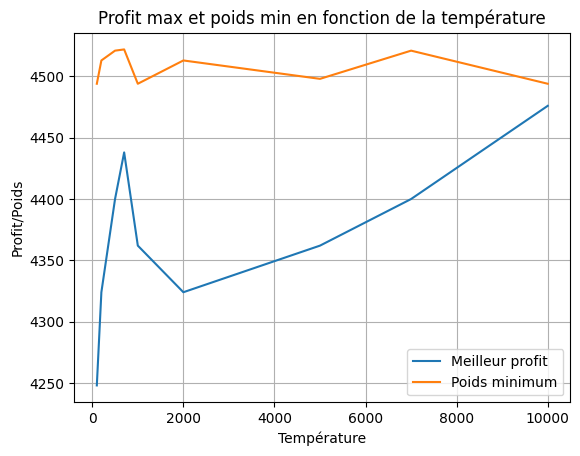

In [236]:
x = temperatures
y1 = [max_profits_temp[temp] for temp in temperatures]
y2 = [min_weights_temp[temp] for temp in temperatures]

plt.plot(x, y1, label='Meilleur profit')
plt.plot(x, y2, label='Poids minimum')
plt.xlabel('Température')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de la température')
plt.legend()
plt.grid()
plt.show()

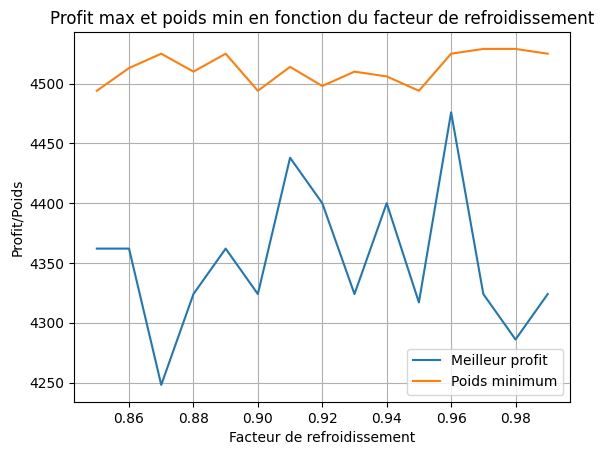

In [237]:
z = cooling_rates
z1 = [max_profits_CR[cr] for cr in cooling_rates]
z2 = [min_weights_CR[cr] for cr in cooling_rates]

plt.plot(z, z1, label='Meilleur profit')
plt.plot(z, z2, label='Poids minimum')
plt.xlabel('Facteur de refroidissement')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction du facteur de refroidissement')
plt.legend()
plt.grid()
plt.show()

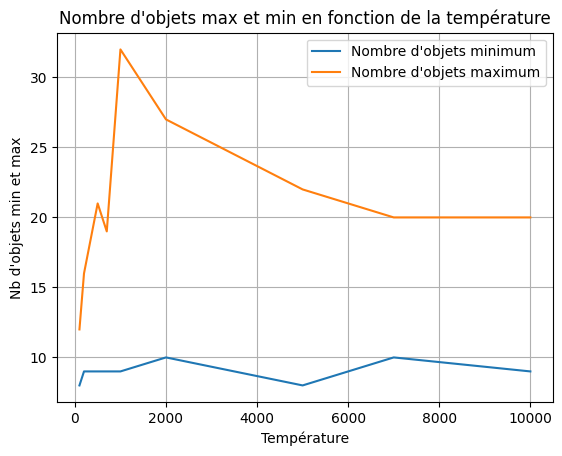

In [110]:
y3 = [min_objects_temp[temp] for temp in temperatures]
y4 = [max_objects_temp[temp] for temp in temperatures]

plt.plot(x, y3, label='Nombre d\'objets minimum')
plt.plot(x, y4, label='Nombre d\'objets maximum')
plt.title("Nombre d'objets max et min en fonction de la température")
plt.xlabel('Température')
plt.ylabel("Nb d'objets min et max")
plt.legend()
plt.grid()
plt.show()

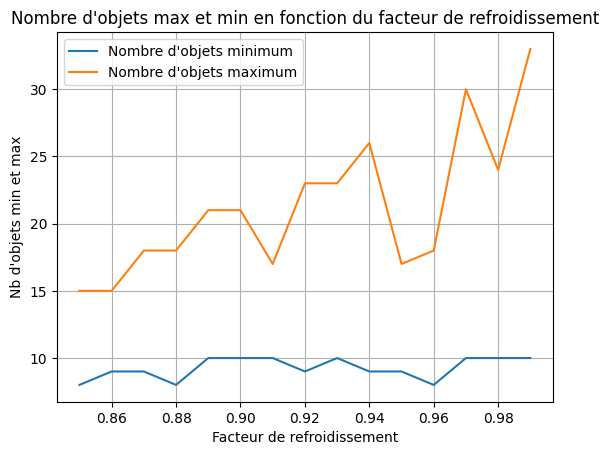

In [ ]:
z3 = [min_objects_CR[cr] for cr in cooling_rates]
z4 = [max_objects_CR[cr] for cr in cooling_rates]

plt.plot(z, z3, label='Nombre d\'objets minimum')
plt.plot(z, z4, label='Nombre d\'objets maximum')
plt.title("Nombre d'objets max et min en fonction du facteur de refroidissement")
plt.xlabel('Facteur de refroidissement')
plt.ylabel("Nb d'objets min et max")
plt.legend()
plt.grid()
plt.show()

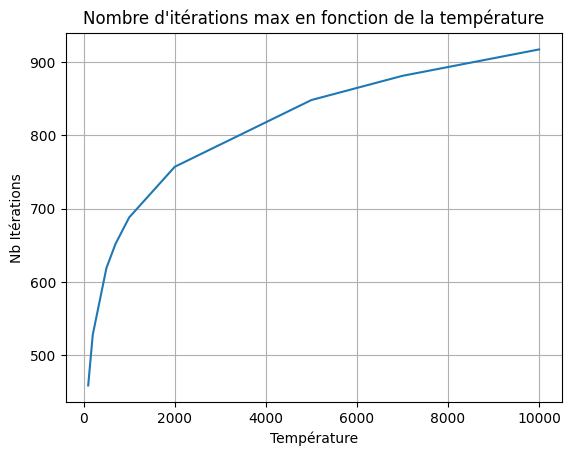

In [ ]:
y5 = [max_iterations_temp[temp] for temp in temperatures]

plt.plot(x, y5, label='Nombre d\'itérations maximum')
plt.title('Nombre d\'itérations max en fonction de la température')
plt.xlabel('Température')
plt.ylabel('Nb Itérations')
plt.grid()
plt.show()

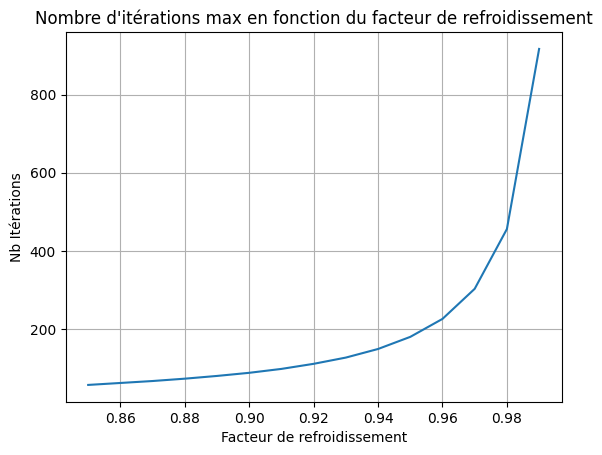

In [ ]:
z5 = [max_iterations_CR[cr] for cr in cooling_rates]

plt.plot(z, z5, label='Nombre d\'itérations maximum')
plt.title('Nombre d\'itérations max en fonction du facteur de refroidissement')
plt.xlabel('Facteur de refroidissement')
plt.ylabel('Nb Itérations')
plt.grid()
plt.show()

     Température    CR  Profit max
0            100  0.85        4165
1            100  0.86        4165
2            100  0.87        4165
3            100  0.88        4165
4            100  0.89        4165
..           ...   ...         ...
130        10000  0.95        4165
131        10000  0.96        4165
132        10000  0.97        4165
133        10000  0.98        4165
134        10000  0.99        4165

[135 rows x 3 columns]
                            OLS Regression Results                            
Dep. Variable:             Profit max   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -66.00
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               1.00
Time:                        15:11:14   Log-Likelihood:                 3303.1
No. Observations:                 135   AIC:                            -6600.
Df 

c:\Users\cerik\OneDrive\Desktop\4A INFO\Projet Knapsack\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


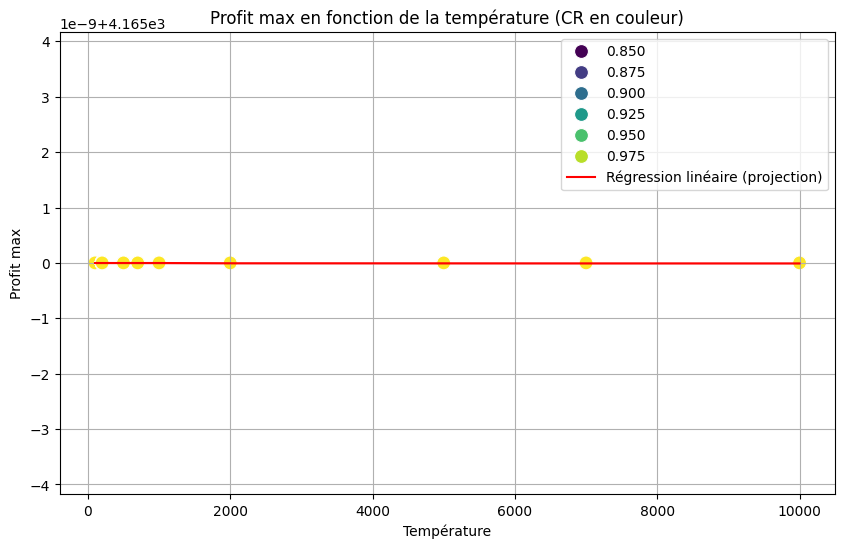

In [115]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

def collecter_donnees_recuit(temp_list, cr_list, n, fichier):
    donnees = []

    for temp in temp_list:
        for cr in cr_list:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule{n}_{fichier}.csv"
            
            if os.path.exists(file_name):
                try:
                    df = pd.read_csv(file_name)
                    if 'Nouveau profit' in df.columns:
                        profit = df['Nouveau profit'].iloc[0]
                        donnees.append({
                            "Température": temp,
                            "CR": cr,
                            "Profit max": profit
                        })
                    else:
                        print(f"'profit_final' manquant dans {file_name}")
                except Exception as e:
                    print(f"Erreur de lecture {file_name} : {e}")
            else:
                print(f"Fichier introuvable : {file_name}")

    return pd.DataFrame(donnees)

data_pi12_n100 = collecter_donnees_recuit(temperatures, cooling_rates, 1000, 12)
print(data_pi12_n100)

def tracer_regression_lineaire(df):
    X = df[["Température", "CR"]]
    y = df["Profit max"]

    X = sm.add_constant(X)

    # Régression linéaire
    model = sm.OLS(y, X).fit()
    print(model.summary())

    # Extraction des coefficients
    a = model.params["Température"]
    b = model.params["CR"]
    c = model.params["const"]

    print(f"L'équation de régression linéaire est : Profit max = {a:.4f} * Température + {b:.4f} * CR + {c:.4f}")

    y_pred = model.predict(X)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x="Température", y="Profit max", hue="CR", palette="viridis", s=100)
    sns.lineplot(x=df["Température"], y=y_pred, color="red", label="Régression linéaire (projection)")
    plt.title("Profit max en fonction de la température (CR en couleur)")
    plt.legend()
    plt.grid()
    plt.show()

tracer_regression_lineaire(data_pi12_n100)


In [238]:
import os
import pandas as pd

def find_optimal_solution(temperatures, cooling_rates, optimal_solution):
    filenames = []
    for temp in temperatures:
        for cr in cooling_rates:
            filename = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"
            if os.path.exists(filename):
                try:
                    df = pd.read_csv(filename)
                    if "Nouvelle solution" in df.columns:
                        if optimal_solution in df["Nouvelle solution"].values:
                            filenames.append(filename)
                except pd.errors.ParserError:
                    print(f"Warning: Could not parse file {filename}. Skipping.")
    return filenames

In [240]:
def find_files_with_profit_and_weight(target_profit, target_weight, dossier="Resultats"):
    filenames = []
    for filename in os.listdir(dossier):
        if filename.startswith("Temp") and filename.endswith("1000_12.csv"):
            full_path = os.path.join(dossier, filename)
            try:
                df = pd.read_csv(full_path)
                if 'Nouveau profit' in df.columns and 'Nouveau Poids' in df.columns:
                    match = (df['Nouveau profit'] == target_profit) & (df['Nouveau Poids'] == target_weight)
                    if any(match):
                        filenames.append(filename)
            except pd.errors.ParserError:
                print(f"Fichier {filename} non retrouve.")
    return filenames



In [241]:
fichier_optimal = find_optimal_solution(temperatures, cooling_rates, best_solution_str)

if len(fichier_optimal) == 0:
    print("Le recuit simulé n'a pas abouti à la solution optimale en termes de choix/répartition d'objets.")
else:
    for f in fichier_optimal:
        print(f)

Le recuit simulé n'a pas abouti à la solution optimale en termes de choix/répartition d'objets.


In [242]:
found_files = find_files_with_profit_and_weight(target_profit, target_weight)
for f in found_files:
  print(f)

A éxecuter uniquement si le recuit simulé a pu donner la solution optimale 

In [ ]:
def analyze_files(found_files):
    temp_counts = {}
    cr_counts = {}

    for file in found_files:
        try:
            df = pd.read_csv(file)

            # Extract temperature and cooling rate from the filename
            parts = file.split("_")
            temp_str = parts[0].split("Temp")[1]
            cr_str = parts[1].split("CR")[1].split("resultats")[0]

            temperature = int(temp_str)
            cooling_rate = float(cr_str)

            # Update counts
            temp_counts[temperature] = temp_counts.get(temperature, 0) + 1
            cr_counts[cooling_rate] = cr_counts.get(cooling_rate, 0) + 1

        except FileNotFoundError:
            print(f"File not found: {file}")
        except (pd.errors.EmptyDataError, pd.errors.ParserError):
            print(f"Error reading file or empty file: {file}")
        except Exception as e:
            print(f"An unexpected error occurred with file {file}: {e}")


    return temp_counts, cr_counts

In [ ]:
temp_dict, cr_dict = analyze_files(found_files)

print("Temperature counts:", temp_dict)
print("Cooling rate counts:", cr_dict)

max_temps = max(temp_dict, key=temp_dict.get)
print("La température optimale est:", max_temps)
max_crs = max(cr_dict, key=cr_dict.get)
print("Le facteur de refroidissement optimal est:", max_crs)

Temperature counts: {}
Cooling rate counts: {}


ValueError: max() arg is an empty sequence

#### Métaheuristique 2 - Génétique

In [88]:
def roulette_selection(population, profits):
    # Calcul du profit total pour la population
    fitness = [calculate_profit(sol, profits) for sol in population]
    total_fitness = sum(fitness)

    # Si la fitness totale est 0, on retourne un choix aléatoire
    if total_fitness == 0:
        return random.choice(population)

    # Sélection d'un parent par roulette
    pick = random.uniform(0, total_fitness)
    current = 0
    for i, sol in enumerate(population):
        current += fitness[i]
        if current > pick:
            return sol
    return population[-1]  # Retourne le dernier si aucune sélection avant


In [89]:
def crossover(nb_items, parent1, parent2, max_capacity, weights):
    point = random.randint(1, nb_items - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]

    # Vérification si les enfants sont valides
    if calculate_weight(child1, weights) > max_capacity:
        child1 = parent1  # Si l'enfant dépasse la capacité, on garde le parent
    if calculate_weight(child2, weights) > max_capacity:
        child2 = parent2  # Idem pour l'autre enfant

    return child1, child2


In [90]:
def mutate(nb_items, max_capacity, weights, solution):
    sol_list = list(solution)
    index = random.randint(0, nb_items - 1)
    sol_list[index] = "1" if sol_list[index] == "0" else "0"

    # Vérification de la validité après mutation
    new_sol = "".join(sol_list)
    if calculate_weight(new_sol, weights) <= max_capacity:
        return new_sol  # Retourner la solution si elle respecte la capacité
    return solution  # Si la mutation rend la solution invalide, on garde l'ancienne solution


In [97]:
import matplotlib.pyplot as plt

def algo_genetique(
      nb_items: int,
      max_capacity: int,
      weights: list,
      profits: list,
      nbPop: int,
      nbGen: int,
      probaCross: float,
      nbBest: int
    ):

    # Initialisation de la population
    population = [gen_valid_solution(max_capacity, weights, nb_items) for _ in range(nbPop)]
    best_solution = max(population, key=lambda sol: calculate_profit(sol, profits))
    best_profit = calculate_profit(best_solution, profits)

    # Pour le graphique
    evolution_profits = []
    evolution_weights = []

    for generation in range(nbGen):
        new_population = []

        # Sélection et reproduction
        for _ in range(nbPop):
            parent1 = roulette_selection(population, profits)
            parent2 = roulette_selection(population, profits)

            # Croisement ou mutation
            if random.random() < probaCross:
                child1, child2 = crossover(nb_items, parent1, parent2, max_capacity, weights)
            else:
                child1 = mutate(nb_items, max_capacity, weights, parent1)
                child2 = mutate(nb_items, max_capacity, weights, parent2)

            new_population.append(child1)
            new_population.append(child2)

        # Garder les meilleures solutions
        population = sorted(new_population, key=lambda sol: calculate_profit(sol, profits), reverse=True)[:nbPop]

        # Meilleure solution actuelle
        current_best_solution = population[0]
        current_best_profit = calculate_profit(current_best_solution, profits)
        current_best_weight = calculate_weight(current_best_solution, weights)

        # Enregistrer l’évolution
        evolution_profits.append(current_best_profit)
        evolution_weights.append(current_best_weight)

        # Mettre à jour la meilleure globale
        if current_best_profit > best_profit:
            best_solution = current_best_solution
            best_profit = current_best_profit

    # Tracer l'évolution du profit et du poids
    '''plt.figure(figsize=(12, 6))

    # Tracer du profit au fil des itérations
    plt.subplot(1, 2, 1)
    plt.plot(evolution_profits, label='Profit', color='blue')
    plt.title('Évolution du profit au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Profit')
    plt.grid(True)

    # Tracer du poids au fil des itérations
    plt.subplot(1, 2, 2)
    plt.plot(evolution_weights, label='Poids', color='red')
    plt.title('Évolution du poids au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Poids')
    plt.grid(True)

    plt.tight_layout()
    plt.show()'''

    return best_solution, best_profit


In [98]:
nbPop = 10  # Taille de la population
nbGen = 100  # Nombre de générations
probaCross = 0.7  # Probabilité de croisement
nbBest = 2  # Nombre de meilleures solutions conservées

best_solution, best_profit = algo_genetique(nb_items_pi12_n1000, max_capacity_pi12_n1000, weights_pi12_n1000, profits_pi12_n1000, nbPop, nbGen, probaCross, nbBest)
print("Meilleure solution trouvée :", best_solution)
print("Meilleur profit :", best_profit)
print("Poids atteind :", calculate_weight(best_solution, weights_pi12_n1000))

Meilleure solution trouvée : 10110000001001000110000100100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

#### Tests

In [99]:
import pandas as pd
import time
import os

def test_algo_genetique(nb_items, max_capacity, weights, profits, nbPop, nbGen, probaCross, nbBest):
                    results = []
                    
                    # Générer une solution initiale valide
                    initial_solution = gen_valid_solution(max_capacity, weights, nb_items)
                    initial_profit = calculate_profit(initial_solution, profits)
                    initial_weight = calculate_weight(initial_solution, weights)

                    # Démarrer le chronomètre
                    start_time = time.time()

                    # Exécuter l'algorithme génétique
                    best_solution, best_profit = algo_genetique(
                        nb_items, max_capacity, weights, profits, nbPop, nbGen, probaCross, nbBest
                    )

                    # Arrêter le chronomètre
                    end_time = time.time()
                    execution_time = end_time - start_time  # Temps en secondes

                    # Calculer le poids et le nombre d'objets de la meilleure solution
                    best_weight = calculate_weight(best_solution, weights)
                    nb_objects = sum(1 for i in range(len(best_solution)) if best_solution[i] == "1")

                    # Enregistrement des résultats
                    results.append({
                        "Solution initiale": initial_solution,
                        "Profit initial": initial_profit,
                        "Poids initial": initial_weight,
                        "NbPop": nbPop,
                        "NbGen": nbGen,
                        "ProbaCross": probaCross,
                        "NbBest": nbBest,
                        "Nouvelle solution": best_solution,
                        "Nouveau profit": best_profit,
                        "Nouveau Poids": best_weight,
                        "Nb objets": nb_objects,
                        "Temps (s)": execution_time
                    })

                    # Convertir en DataFrame et sauvegarder le fichier
                    df = pd.DataFrame(results)
                    return df
                


In [ ]:
# Fixer un interval pour les paramètres

nbPop_list = [10, 50, 70, 100]
nbGen_list = [10, 50, 70, 100]
probaCross_list = [0.1, 0.5, 0.9]
nbBest_list = [2, 5]

'''for nbPop in nbPop_list:
    for nbGen in nbGen_list:
        for probaCross in probaCross_list:
            for nbBest in nbBest_list:
                print(f"NbPop {nbPop}\nNbGen {nbGen}\nProbaCross {probaCross}\nNbBest {nbBest}")
                test = test_algo_genetique(nb_items_pi12_n1000, max_capacity_pi12_n1000, weights_pi12_n1000, profits_pi12_n1000, nbPop, nbGen, probaCross, nbBest)
                test.to_csv(f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000_12.csv", index=False)
'''

NbPop 10
NbGen 10
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 10
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 10
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 10
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 10
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 10
ProbaCross 0.9
NbBest 5
NbPop 10
NbGen 50
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 50
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 50
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 50
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 50
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 50
ProbaCross 0.9
NbBest 5
NbPop 10
NbGen 70
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 70
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 70
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 70
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 70
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 70
ProbaCross 0.9
NbBest 5
NbPop 10
NbGen 100
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 100
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 100
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 100
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 100
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 100
ProbaCross

In [315]:
def extract_max_profit_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for probaCross in probaCross_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[probaCross] = max_profit

    return max_profits

In [316]:
def extract_min_weight_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for probaCross in probaCross_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[probaCross] = min_weight

    return min_weights


In [317]:
max_profits_probaCross = extract_max_profit_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_probaCross)

{0.1: np.int64(4476), 0.5: np.int64(4476), 0.9: np.int64(4469)}


In [318]:
min_weights_probaCross = extract_min_weight_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_probaCross)

{0.1: np.int64(4498), 0.5: np.int64(4501), 0.9: np.int64(4474)}


In [319]:
def extract_max_profit_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbGen in nbGen_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbGen] = max_profit

    return max_profits


In [320]:
def extract_min_weight_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbGen in nbGen_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbGen] = min_weight

    return min_weights

In [321]:
max_profits_nbGen = extract_max_profit_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbGen)

{10: np.int64(4476), 50: np.int64(4476), 70: np.int64(4438), 100: np.int64(4438)}


In [322]:
min_weights_nbGen = extract_min_weight_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbGen)

{10: np.int64(4474), 50: np.int64(4505), 70: np.int64(4498), 100: np.int64(4501)}


In [323]:
def extract_max_profit_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbBest in nbBest_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for probaCross in probaCross_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbBest] = max_profit

    return max_profits

In [324]:
def extract_min_weight_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbBest in nbBest_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for probaCross in probaCross_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbBest] = min_weight

    return min_weights

In [325]:
max_profits_nbBest = extract_max_profit_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbBest)

{2: np.int64(4438), 5: np.int64(4476)}


In [326]:
min_weights_nbBest = extract_min_weight_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbBest)

{2: np.int64(4474), 5: np.int64(4497)}


In [327]:
def extract_max_profit_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbPop in nbPop_list:
        max_profit = float('-inf')

        for nbGen in nbGen_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbPop] = max_profit

    return max_profits

In [328]:
def extract_min_weight_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbPop in nbPop_list:
        min_weight = float('inf')

        for nbGen in nbGen_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbPop] = min_weight

    return min_weights

In [329]:
max_profits_nbPop = extract_max_profit_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbPop)

{10: np.int64(4400), 50: np.int64(4476), 70: np.int64(4469), 100: np.int64(4476)}


In [330]:
min_weights_nbPop = extract_min_weight_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbPop)

{10: np.int64(4498), 50: np.int64(4501), 70: np.int64(4474), 100: np.int64(4501)}


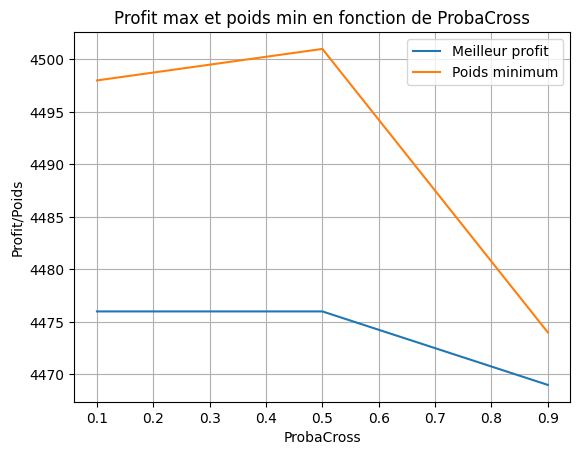

In [265]:
y = probaCross_list
y1 = [max_profits_probaCross[i] for i in y]
y2 = [min_weights_probaCross[i] for i in y]

plt.plot(y, y1, label='Meilleur profit')
plt.plot(y, y2, label='Poids minimum')
plt.xlabel('ProbaCross')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de ProbaCross')
plt.legend()
plt.grid()
plt.show()

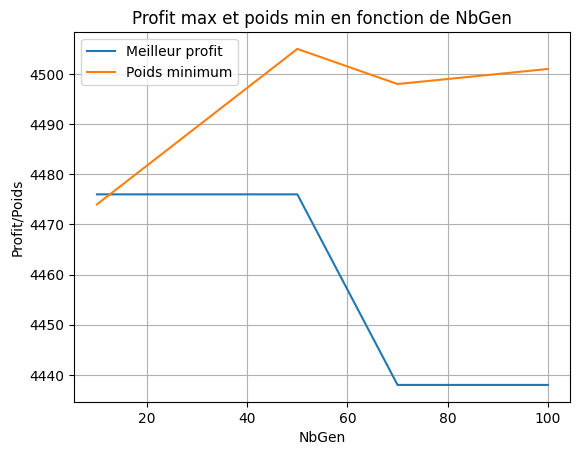

In [266]:
z = nbGen_list
z1 = [max_profits_nbGen[i] for i in z]
z2 = [min_weights_nbGen[i] for i in z]

plt.plot(z, z1, label='Meilleur profit')
plt.plot(z, z2, label='Poids minimum')
plt.xlabel('NbGen')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de NbGen')
plt.legend()
plt.grid()
plt.show()

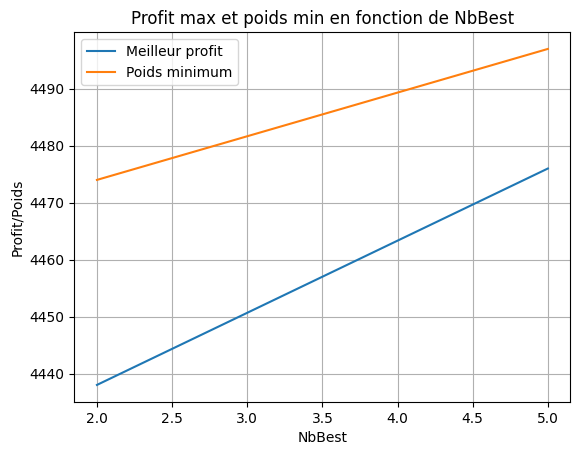

In [267]:
k = nbBest_list
k1 = [max_profits_nbBest[i] for i in k]
k2 = [min_weights_nbBest[i] for i in k]

plt.plot(k, k1, label='Meilleur profit')
plt.plot(k, k2, label='Poids minimum')
plt.xlabel('NbBest')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de NbBest')
plt.legend()
plt.grid()
plt.show()

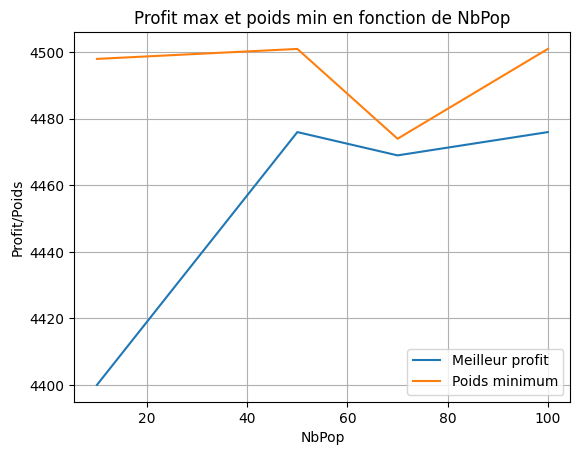

In [268]:
x = nbPop_list
x1 = [max_profits_nbPop[i] for i in x]
x2 = [min_weights_nbPop[i] for i in x]

plt.plot(x, x1, label='Meilleur profit')
plt.plot(x, x2, label='Poids minimum')
plt.xlabel('NbPop')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de NbPop')
plt.legend()
plt.grid()
plt.show()

In [338]:
def find_optimal_solution(nbPop_list, nbGen_list, probaCross_list, nbBest_list, optimal_solution):

    filenames = []
    for nbPop in nbPop_list:
        for nbGen in nbGen_list:
          for probaCross in probaCross_list:
            for nbBest in nbBest_list:
                filename = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000_12.csv"
                if os.path.exists(filename):
                    try:
                        df = pd.read_csv(filename)
                        if optimal_solution in df["Nouvelle solution"].values:
                            filenames.append(filename)
                    except pd.errors.ParserError:
                        print(f"Warning: Could not parse file {filename}. Skipping.")
                else:
                    print(f"Fichier manquant: {filename}")

    return filenames


In [342]:
def find_files_with_profit_and_weight(target_profit, target_weight, dossier="Resultats"):
    filenames = []

    for filename in os.listdir(dossier):
        if filename.startswith("NbPop") and filename.endswith(".csv"):
            filepath = os.path.join(dossier, filename)
            try:
                df = pd.read_csv(filepath)

                if 'Nouveau profit' in df.columns and 'Nouveau Poids' in df.columns:
                    condition = (df['Nouveau profit'] == target_profit) & (df['Nouveau Poids'] == target_weight)
                    if any(condition):
                        filenames.append(filename)
            except Exception as e:
                print(f"Erreur avec le fichier {filename}: {e}")

    return filenames


In [343]:
fichier_optimal = find_optimal_solution(nbPop_list, nbGen_list, probaCross_list, nbBest_list, best_solution_str)
for f in fichier_optimal:
  print(f) #aucun fichier contient la solution optimale en termes de choix d'objets

In [344]:
print(target_profit)
print(target_weight)
found_files = find_files_with_profit_and_weight(target_profit, target_weight)
for f in found_files:
  print(f)

4514.0
4528


A executer uniquement si le resultat precedent n'est pas nul

In [ ]:
def analyze_files(found_files):
    nbPop_counts = {}
    nbGen_counts = {}
    probaCross_counts = {}
    nbBest_counts = {}

    for file in found_files:
      try:
          df = pd.read_csv(file)

          parts = file.split("_")

          pop_str = parts[0].split("NbPop")[1]
          nbPop_counts[int(pop_str)] = nbPop_counts.get(int(pop_str), 0) + 1

          gen_str = parts[1].split("NbGen")[1]
          nbGen_counts[int(gen_str)] = nbGen_counts.get(int(gen_str), 0) + 1

          probaCross_str = parts[2].split("ProbaCross")[1]
          probaCross_counts[float(probaCross_str)] = probaCross_counts.get(float(probaCross_str), 0) + 1

          best_str = parts[3].split("NbBest")[1]
          nbBest_counts[int(best_str)] = nbBest_counts.get(int(best_str), 0) + 1
      except pd.errors.ParserError:
          print(f"Fichier {file} non retrouve.")

    return nbPop_counts, nbGen_counts, probaCross_counts, nbBest_counts

In [335]:
nbPop_dict, nbGen_dict, probaCross_dict, nbBest_dict = analyze_files(found_files)
print(nbPop_dict)
print(nbGen_dict)
print(probaCross_dict)
print(nbBest_dict)

max_nbPop = max(nbPop_dict, key=nbPop_dict.get)
print("Le nombre de population optimal est:", max_nbPop)
max_nbGen = max(nbGen_dict, key=nbGen_dict.get)
print("Le nombre de génération optimal est:", max_nbGen)
max_probaCross = max(probaCross_dict, key=probaCross_dict.get)
print("La probabilité de croisement optimale est:", max_probaCross)
max_nbBest = max(nbBest_dict, key=nbBest_dict.get)
print("Le nombre de meilleures solutions optimal est:", max_nbBest)

{}
{}
{}
{}


ValueError: max() arg is an empty sequence

### Pi-12: n=10 000

In [285]:
file_pi12_n10000 = "pi-12-10000-1000-001.kna"

def extract_data(file_path):
  with open(file_path, 'r') as f:
      content = f.readlines()
      profit = []
      weight = []
      for i in range(7, len(content)):
        profit.append(content[i].split(" ")[1])
        weight.append(content[i].split(" ")[2].split("\n")[0])
  return profit, weight

In [286]:
profits_pi12_n10000, weights_pi12_n10000 = extract_data(file_pi12_n10000)
profits_pi12_n10000 = [int(i) for i in profits_pi12_n10000]
weights_pi12_n10000 = [int(i) for i in weights_pi12_n10000]
print(profits_pi12_n10000)
print(weights_pi12_n10000)

[582, 194, 679, 485, 312, 873, 468, 208, 364, 260, 582, 388, 291, 104, 520, 416, 970, 260, 582, 364, 776, 194, 468, 970, 312, 260, 156, 485, 416, 364, 582, 388, 468, 679, 52, 156, 312, 520, 52, 520, 468, 260, 468, 582, 388, 291, 468, 485, 312, 104, 468, 194, 97, 776, 388, 468, 416, 104, 104, 582, 485, 208, 388, 520, 104, 260, 364, 582, 468, 260, 208, 156, 679, 679, 97, 582, 97, 156, 679, 520, 208, 291, 776, 52, 291, 468, 156, 520, 468, 52, 873, 194, 520, 873, 873, 104, 873, 416, 776, 312, 468, 260, 520, 873, 97, 364, 468, 485, 104, 970, 582, 873, 776, 104, 416, 416, 485, 312, 194, 388, 260, 776, 156, 468, 873, 104, 156, 312, 970, 260, 104, 156, 416, 520, 208, 104, 97, 156, 364, 679, 156, 291, 416, 485, 52, 679, 776, 260, 970, 364, 97, 312, 208, 104, 679, 52, 194, 970, 194, 291, 388, 388, 194, 679, 52, 520, 52, 364, 520, 776, 776, 520, 873, 970, 485, 364, 291, 970, 291, 364, 416, 679, 156, 416, 52, 582, 291, 388, 520, 156, 104, 312, 776, 582, 468, 416, 208, 679, 260, 970, 970, 97, 485, 

In [287]:
def extract_info(file_path):
  with open(file_path, 'r') as f:
      content = f.readlines()
      content_line4 = content[3].split("NB_ITEMS: ")
      nb_items = content_line4[1].split("\n")[0]
      content_line5 = content[4].split("MAX_CAPACITY: ")
      max_capacity = content_line5[1].split("\n")[0]
      max_capacity = int(max_capacity)


  return int(nb_items), int(max_capacity)

In [288]:
nb_items_pi12_n10000, max_capacity_pi12_n10000 = extract_info(file_pi12_n10000)
print(nb_items_pi12_n10000)
print(max_capacity_pi12_n10000)

10000
45132


In [289]:
def calculate_profit(
    solution: str,
    profits: list
  ):

  profit = 0
  for i in range(len(solution)):
    if solution[i] == "1":
      profit += int(profits[i])

  return profit

In [290]:
def calculate_weight(
    solution: str,
    weights: list
  ):

  weight = 0
  for i in range(len(solution)):
    if solution[i] == "1":
      weight += int(weights[i])

  return weight

#### Création d'une solution valide (pas forcément optimale):
-->Ajouter des items aléatoirement dans le sac à dos jusqu'à arriver au poids maximal.

In [291]:
import random

def gen_valid_solution(max_capacity, weights, nb_items):
    sol = []  #liste pour stocker la solution binaire
    current_capacity = 0

    for i in range(nb_items):
        if current_capacity >= max_capacity:
            sol.append("0")  # Si on atteint la limite, on met "0"
        else:
            bit = random.choice(["0", "1"])
            if bit == "1" and current_capacity + weights[i] > max_capacity:
                bit = "0"  # On force un "0" si ajouter 1 dépasse la capacité
            sol.append(bit)
            if bit == "1":
                current_capacity += weights[i]  # Mise à jour du poids

    return "".join(sol)


In [293]:
print("Poids à ne pas dépasser: ",max_capacity_pi12_n10000)
a_solution = gen_valid_solution(max_capacity_pi12_n10000, weights_pi12_n10000, nb_items_pi12_n10000)
print("Une solution valide est: ", a_solution)
print("Le profit de cette solution est: ", calculate_profit(a_solution, profits_pi12_n10000))
print("Le poids total de cette solution est: ", calculate_weight(a_solution, weights_pi12_n10000))

Poids à ne pas dépasser:  45132
Une solution valide est:  111110111110101010011011001111010100110100100100101111001011011010100010110000011110110111001010101001101110000111001101001111100000011000110110001010111111000000010111101000000000000010000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

#### La solution optimale avec un solver

In [296]:
from ortools.linear_solver import pywraplp
import numpy as np
import time

def solve_knapsack(profits, weights, capacity_max):
    solver = pywraplp.Solver.CreateSolver('SCIP')
    if not solver:
        print("Solveur non disponible.")
        return None, None

    n = len(profits)

    x = [solver.BoolVar(f'x_{i}') for i in range(n)]

    # Contrainte de capacité
    solver.Add(solver.Sum(weights[i] * x[i] for i in range(n)) <= capacity_max)

    # Fonction objectif : maximiser le profit total
    solver.Maximize(solver.Sum(profits[i] * x[i] for i in range(n)))

    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        best_solution = [int(x[i].solution_value()) for i in range(n)]
        best_profit = solver.Objective().Value()
        return best_solution, best_profit
    else:
        print("Aucune solution optimale trouvée.")
        return None, None


time1 = time.time()

best_solution, best_profit = solve_knapsack(profits_pi12_n10000, weights_pi12_n10000, max_capacity_pi12_n10000)

if best_solution:
    target_profit = best_profit
    target_weight = sum(weights_pi12_n10000[i] for i in range(len(best_solution)) if best_solution[i] == 1)

    print("Meilleure solution trouvée :", best_solution)
    print("Meilleur profit :", target_profit)
    print("Poids atteint :", target_weight)

    indice = np.where(np.array(best_solution) == 1)[0]
    print(indice)
    print("nb d'objets: ",len(indice))

    time2 = time.time()
    temps_exec10000 = time2 - time1
    print("Temps d'exécution : ", temps_exec10000)

    #temps_solver.append(temps_exec10000)
    print(temps_solver)
else:
    print("Pas de solution trouvée par le solveur.")


Meilleure solution trouvée : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [297]:
best_solution_str = "".join(map(str, best_solution))
print("Meilleure solution trouvée (string):", best_solution_str)

Meilleure solution trouvée (string): 100000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000100000000000000000100000000000000000000000000100000000000000000100000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000

#### Métaheuristique 1 - Recuit simulé

Poids à ne pas dépasser: 45132
Solution initiale choisie aléatoirement:  001001001011001111111101001010100110010100100010010110010111100101110100011000110111011111010010011010110010111111111011001000111111111011101110000011110010100010100110100000101000000010000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

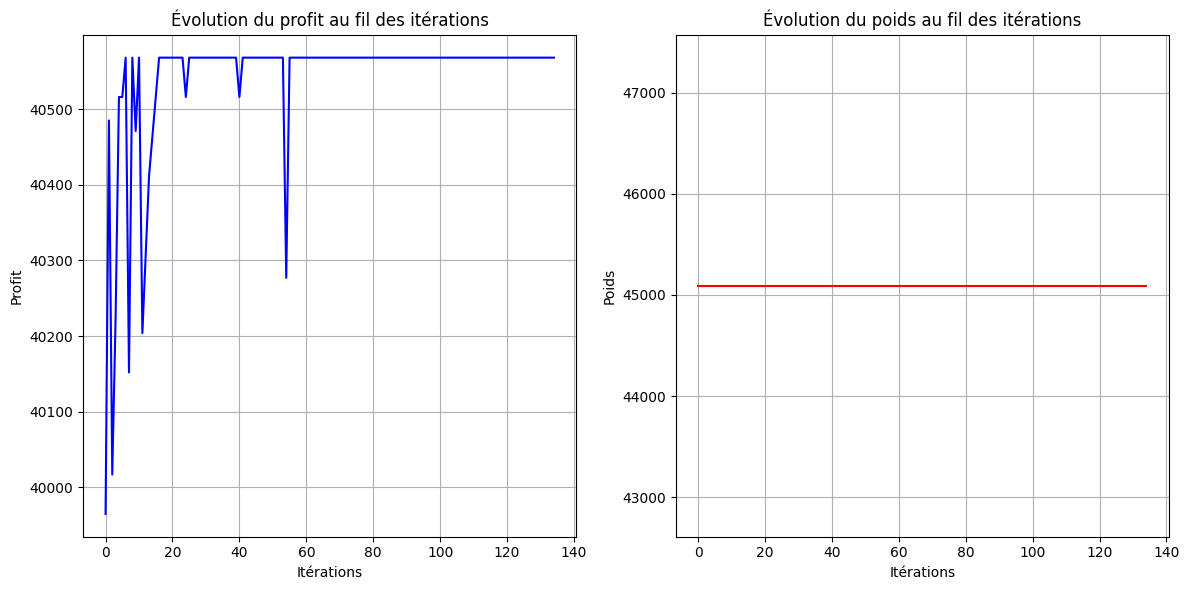

Meilleure solution trouvée : 00100100101100111111110100101010011001010010001001011001011110010111010001100011011101110101001001101011001011111111101100100011111111101110111000001111001010001010001010000010100000001000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [298]:
# Test du recuit simulé

print("Poids à ne pas dépasser:", max_capacity_pi12_n10000)
initial_solution = gen_valid_solution(max_capacity_pi12_n10000, weights_pi12_n10000, nb_items_pi12_n10000)

print("Solution initiale choisie aléatoirement: ",initial_solution)
print("Son profit actuel:",calculate_profit(initial_solution, profits_pi12_n10000))
print("Son poids actuel:",calculate_weight(initial_solution, weights_pi12_n10000))
print()

temperature = 1000
cooling_rate = 0.95

best_sol, best_prof, iterations = simulated_annealing(initial_solution, max_capacity_pi12_n10000, profits_pi12_n10000, weights_pi12_n10000, temperature, cooling_rate)
print("Meilleure solution trouvée :", best_sol)
print("Meilleur profit :", best_prof)
print("Poids atteind :", calculate_weight(best_sol, weights_pi12_n10000))
print(f"Solution trouvée en {iterations} itérations")


#### Tests


In [299]:
import pandas as pd
import time

def test_recuit_simule(temperature, cooling_rate, max_capacity, profits, weights, nb_items):
    results = []

    # Générer une solution initiale valide
    initial_solution = gen_valid_solution(max_capacity, weights, nb_items)
    initial_profit = calculate_profit(initial_solution, profits)
    initial_weight = calculate_weight(initial_solution, weights)

    # Démarrer le chronomètre
    start_time = time.time()

    # Appliquer le recuit simulé
    best_solution, best_profit, iterations = simulated_annealing(
        initial_solution, max_capacity, profits, weights, temperature, cooling_rate
    )

    # Arrêter le chronomètre
    end_time = time.time()
    execution_time = end_time - start_time  # Temps en secondes

    best_weight = calculate_weight(best_solution, weights)
    nb_objects = 0
    for i in range(len(best_solution)):
      if best_solution[i] == "1":
        nb_objects += 1

    # Enregistrement des résultats
    results.append({
        "Solution initiale": initial_solution,
        "Profit initial": initial_profit,
        "Poids initial": initial_weight,
        "Temperature": temperature,
        "Cooling Rate": cooling_rate,
        "Nouvelle solution": best_solution,
        "Nouveau profit": best_profit,
        "Nouveau Poids": best_weight,
        "Nb Itérations": iterations,
        "Nb objets": nb_objects,
        "Temps (s)": execution_time
    })

    # Convertir en DataFrame pandas
    df = pd.DataFrame(results)

    return df

In [300]:
temperatures = [100, 200, 500, 700, 1000, 2000, 5000, 7000, 10000]
cooling_rates = [round(0.85 + i * 0.01, 2) for i in range(15)] # pour [0.85, 0.86, ..., 0.99]

'''for temperature in temperatures:
    for cooling_rate in cooling_rates:
        print(f"Temp {temperature}\nCooling rate {cooling_rate}")
        test = test_recuit_simule(temperature, cooling_rate, max_capacity_pi12_n10000, profits_pi12_n10000, weights_pi12_n10000, nb_items_pi12_n10000)
        test.to_csv(f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule{nb_items_pi12_n10000}_12.csv", index=False)
'''

'for temperature in temperatures:\n    for cooling_rate in cooling_rates:\n        print(f"Temp {temperature}\nCooling rate {cooling_rate}")\n        test = test_recuit_simule(temperature, cooling_rate, max_capacity_pi12_n10000, profits_pi12_n10000, weights_pi12_n10000, nb_items_pi12_n10000)\n        test.to_csv(f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule{nb_items_pi12_n10000}_12.csv", index=False)\n'

#### Graphiques

In [301]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_profit_from_temp(temperatures, cooling_rates):
    max_profits = {}

    for temperature in temperatures:
        max_profit = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_profit = max(max_profit, df["Nouveau profit"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_profits[temperature] = max_profit

    return max_profits


In [302]:
import pandas as pd
import os

def extract_max_profit_from_CR(temperatures, cooling_rates):
    max_profits = {}

    for cooling_rate in cooling_rates:
        max_profit = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nouveau profit"].max()
                max_profit = max(max_profit, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        max_profits[cooling_rate] = max_profit if max_profit != float('-inf') else None

    return max_profits


In [303]:
max_profits_temp = extract_max_profit_from_temp(temperatures, cooling_rates)
print(max_profits_temp)

{100: np.int64(41228), 200: np.int64(41418), 500: np.int64(41615), 700: np.int64(41380), 1000: np.int64(41114), 2000: np.int64(41152), 5000: np.int64(41646), 7000: np.int64(41463), 10000: np.int64(41418)}


In [304]:
max_profits_CR = extract_max_profit_from_CR(temperatures, cooling_rates)
print(max_profits_CR)

{0.85: np.int64(41069), 0.86: np.int64(41342), 0.87: np.int64(41342), 0.88: np.int64(41114), 0.89: np.int64(41380), 0.9: np.int64(41342), 0.91: np.int64(41228), 0.92: np.int64(41266), 0.93: np.int64(41418), 0.94: np.int64(41259), 0.95: np.int64(40993), 0.96: np.int64(41380), 0.97: np.int64(41463), 0.98: np.int64(41646), 0.99: np.int64(41463)}


In [305]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_min_weight_from_temp(temperatures, cooling_rates):
    min_weights = {}

    for temperature in temperatures:
        min_weight = float('inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                min_weight = min(min_weight, df["Nouveau Poids"].min())
            else:
                print(f"Warning: File {file_name} not found.")

        min_weights[temperature] = min_weight

    return min_weights

In [306]:
def extract_min_weight_from_CR(temperatures, cooling_rates):
    min_weights = {}

    for cooling_rate in cooling_rates:
        min_weight = float('inf')

        for temperature in temperatures:
            filename = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(filename):
                df = pd.read_csv(filename)
                min_weight = min(min_weight, df["Nouveau Poids"].min())
            else:
                print(f"Fichier manquant: {filename}")

        min_weights[cooling_rate] = min_weight

    return min_weights


In [307]:
min_weights_temp = extract_min_weight_from_temp(temperatures, cooling_rates)
print(min_weights_temp)

{100: np.int64(45076), 200: np.int64(45090), 500: np.int64(45083), 700: np.int64(45088), 1000: np.int64(45076), 2000: np.int64(45068), 5000: np.int64(45070), 7000: np.int64(45083), 10000: np.int64(45070)}


In [308]:
min_weights_CR = extract_min_weight_from_CR(temperatures, cooling_rates)
print(min_weights_CR)

{0.85: np.int64(45083), 0.86: np.int64(45070), 0.87: np.int64(45076), 0.88: np.int64(45075), 0.89: np.int64(45090), 0.9: np.int64(45070), 0.91: np.int64(45094), 0.92: np.int64(45098), 0.93: np.int64(45076), 0.94: np.int64(45081), 0.95: np.int64(45098), 0.96: np.int64(45099), 0.97: np.int64(45099), 0.98: np.int64(45068), 0.99: np.int64(45107)}


In [309]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_min_object_from_temp(temperatures, cooling_rates):
    min_objects = {}

    for temperature in temperatures:
        min_object = float('inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                min_object = min(min_object, df["Nb objets"].min())
            else:
                print(f"Fichier manquant: {file_name}")

        min_objects[temperature] = min_object

    return min_objects

In [310]:
import pandas as pd
import os

def extract_min_object_from_CR(temperatures, cooling_rates):
    min_objects = {}

    for cooling_rate in cooling_rates:
        min_object = float('inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_min = df["Nb objets"].min()
                min_object = min(min_object, current_min)
            else:
                print(f"Fichier manquant: {file_name}")

        if min_object != float('inf'):
            min_objects[cooling_rate] = min_object
        else:
            min_objects[cooling_rate] = None

    return min_objects


In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_object_from_temp(temperatures, cooling_rates):
    max_objects = {}

    for temperature in temperatures:
        max_object = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_object = max(max_object, df["Nb objets"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_objects[temperature] = max_object

    return max_objects

In [144]:
import pandas as pd
import os

def extract_max_object_from_CR(temperatures, cooling_rates):
    max_objects = {}

    for cooling_rate in cooling_rates:
        max_object = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nb objets"].max()
                max_object = max(max_object, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_object != float('-inf'):
            max_objects[cooling_rate] = max_object
        else:
            max_objects[cooling_rate] = None

    return max_objects


In [145]:
max_objects_temp = extract_max_object_from_temp(temperatures, cooling_rates)
print(max_objects_temp)
min_objects_temp = extract_min_object_from_temp(temperatures, cooling_rates)
print(min_objects_temp)

{100: np.int64(115), 200: np.int64(117), 500: np.int64(134), 700: np.int64(140), 1000: np.int64(150), 2000: np.int64(164), 5000: np.int64(208), 7000: np.int64(207), 10000: np.int64(217)}
{100: np.int64(88), 200: np.int64(99), 500: np.int64(87), 700: np.int64(95), 1000: np.int64(91), 2000: np.int64(103), 5000: np.int64(108), 7000: np.int64(92), 10000: np.int64(102)}


In [146]:
max_objects_CR = extract_max_object_from_CR(temperatures, cooling_rates)
print(max_objects_CR)
min_objects_CR = extract_min_object_from_CR(temperatures, cooling_rates)
print(min_objects_CR)

{0.85: np.int64(127), 0.86: np.int64(117), 0.87: np.int64(126), 0.88: np.int64(120), 0.89: np.int64(126), 0.9: np.int64(127), 0.91: np.int64(121), 0.92: np.int64(131), 0.93: np.int64(125), 0.94: np.int64(136), 0.95: np.int64(134), 0.96: np.int64(140), 0.97: np.int64(157), 0.98: np.int64(171), 0.99: np.int64(217)}
{0.85: np.int64(100), 0.86: np.int64(91), 0.87: np.int64(99), 0.88: np.int64(92), 0.89: np.int64(103), 0.9: np.int64(105), 0.91: np.int64(92), 0.92: np.int64(99), 0.93: np.int64(95), 0.94: np.int64(88), 0.95: np.int64(97), 0.96: np.int64(87), 0.97: np.int64(99), 0.98: np.int64(99), 0.99: np.int64(91)}


In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_iterations_from_temp(temperatures, cooling_rates):
    max_iterations = {}

    for temperature in temperatures:
        max_iteration = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_iteration = max(max_iteration, df["Nb Itérations"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_iterations[temperature] = max_iteration

    return max_iterations

In [149]:
import pandas as pd
import os

def extract_max_iterations_from_CR(temperatures, cooling_rates):
    max_iterations = {}

    for cooling_rate in cooling_rates:
        max_iteration = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nb Itérations"].max()
                max_iteration = max(max_iteration, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_iteration != float('-inf'):
            max_iterations[cooling_rate] = max_iteration
        else:
            max_iterations[cooling_rate] = None

    return max_iterations


In [150]:
max_iterations_temp = extract_max_iterations_from_temp(temperatures, cooling_rates)
print(max_iterations_temp)

{100: np.int64(459), 200: np.int64(528), 500: np.int64(619), 700: np.int64(652), 1000: np.int64(688), 2000: np.int64(757), 5000: np.int64(848), 7000: np.int64(881), 10000: np.int64(917)}


In [151]:
max_iterations_CR = extract_max_iterations_from_CR(temperatures, cooling_rates)
print(max_iterations_CR)

{0.85: np.int64(57), 0.86: np.int64(62), 0.87: np.int64(67), 0.88: np.int64(73), 0.89: np.int64(80), 0.9: np.int64(88), 0.91: np.int64(98), 0.92: np.int64(111), 0.93: np.int64(127), 0.94: np.int64(149), 0.95: np.int64(180), 0.96: np.int64(226), 0.97: np.int64(303), 0.98: np.int64(456), 0.99: np.int64(917)}


In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_time_from_temp(temperatures, cooling_rates):
    max_times = {}

    for temperature in temperatures:
        max_time = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_time = max(max_time, df["Temps (s)"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_times[temperature] = max_time

    return max_times

In [154]:
import pandas as pd
import os

def extract_max_time_from_CR(temperatures, cooling_rates):
    max_times = {}

    for cooling_rate in cooling_rates:
        max_time = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Temps (s)"].max()
                max_time = max(max_time, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_time != float('-inf'):
            max_times[cooling_rate] = max_time
        else:
            max_times[cooling_rate] = None

    return max_times


In [155]:
max_time_temp = extract_max_time_from_temp(temperatures, cooling_rates)
print(max_time_temp)

{100: np.float64(113.4909725189209), 200: np.float64(80.91828870773315), 500: np.float64(61.10956525802612), 700: np.float64(86.61592149734497), 1000: np.float64(67.87502646446228), 2000: np.float64(92.33933162689208), 5000: np.float64(80.26292777061462), 7000: np.float64(90.32473134994508), 10000: np.float64(87.54775166511536)}


In [156]:
max_time_CR = extract_max_time_from_CR(temperatures, cooling_rates)
print(max_time_CR)

{0.85: np.float64(8.755735158920288), 0.86: np.float64(12.164663076400757), 0.87: np.float64(13.112239837646484), 0.88: np.float64(11.390555143356323), 0.89: np.float64(16.763962984085083), 0.9: np.float64(15.545188903808594), 0.91: np.float64(16.741026639938354), 0.92: np.float64(17.190131664276123), 0.93: np.float64(26.73693561553955), 0.94: np.float64(32.639495849609375), 0.95: np.float64(32.45256948471069), 0.96: np.float64(40.88968300819397), 0.97: np.float64(62.03925943374634), 0.98: np.float64(71.27529692649841), 0.99: np.float64(113.4909725189209)}


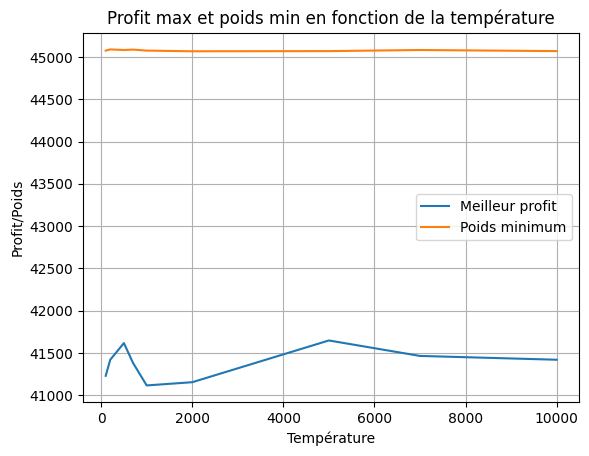

In [311]:
# Dessiner les graphiques

x = temperatures
y1 = [max_profits_temp[temp] for temp in temperatures]
y2 = [min_weights_temp[temp] for temp in temperatures]

plt.plot(x, y1, label='Meilleur profit')
plt.plot(x, y2, label='Poids minimum')
plt.xlabel('Température')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de la température')
plt.legend()
plt.grid()
plt.show()

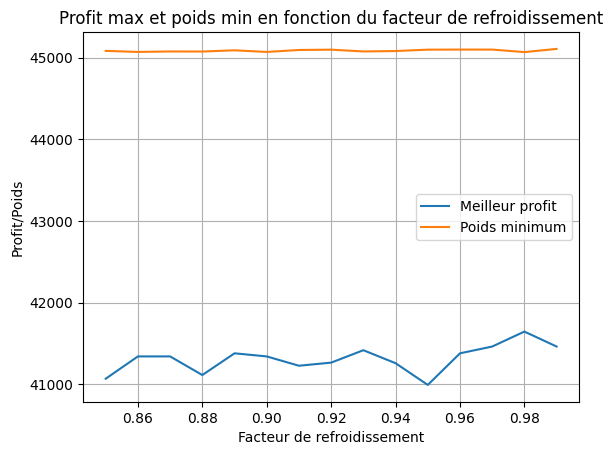

In [312]:
z = cooling_rates
z1 = [max_profits_CR[cr] for cr in cooling_rates]
z2 = [min_weights_CR[cr] for cr in cooling_rates]

plt.plot(z, z1, label='Meilleur profit')
plt.plot(z, z2, label='Poids minimum')
plt.xlabel('Facteur de refroidissement')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction du facteur de refroidissement')
plt.legend()
plt.grid()
plt.show()

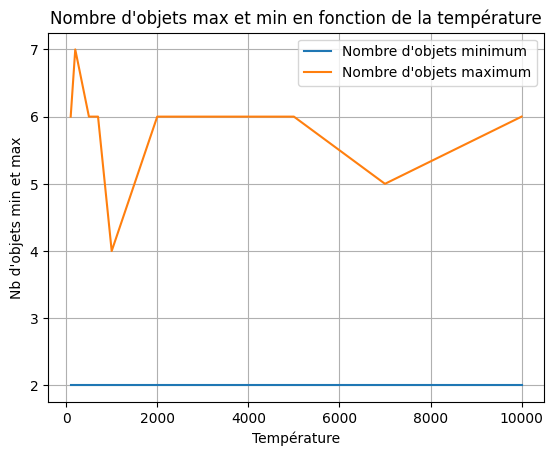

In [ ]:
y3 = [min_objects_temp[temp] for temp in temperatures]
y4 = [max_objects_temp[temp] for temp in temperatures]

plt.plot(x, y3, label='Nombre d\'objets minimum')
plt.plot(x, y4, label='Nombre d\'objets maximum')
plt.title("Nombre d'objets max et min en fonction de la température")
plt.xlabel('Température')
plt.ylabel("Nb d'objets min et max")
plt.legend()
plt.grid()
plt.show()

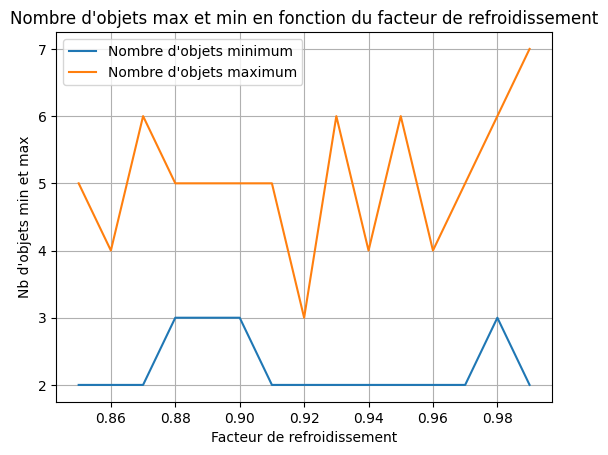

In [ ]:
z3 = [min_objects_CR[cr] for cr in cooling_rates]
z4 = [max_objects_CR[cr] for cr in cooling_rates]

plt.plot(z, z3, label='Nombre d\'objets minimum')
plt.plot(z, z4, label='Nombre d\'objets maximum')
plt.title("Nombre d'objets max et min en fonction du facteur de refroidissement")
plt.xlabel('Facteur de refroidissement')
plt.ylabel("Nb d'objets min et max")
plt.legend()
plt.grid()
plt.show()

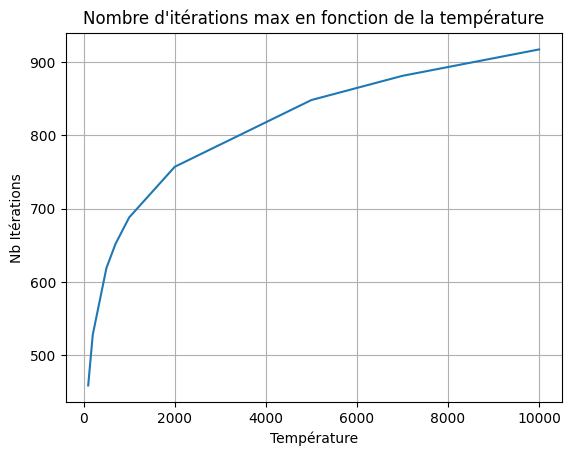

In [ ]:
y5 = [max_iterations_temp[temp] for temp in temperatures]

plt.plot(x, y5, label='Nombre d\'itérations maximum')
plt.title('Nombre d\'itérations max en fonction de la température')
plt.xlabel('Température')
plt.ylabel('Nb Itérations')
plt.grid()
plt.show()

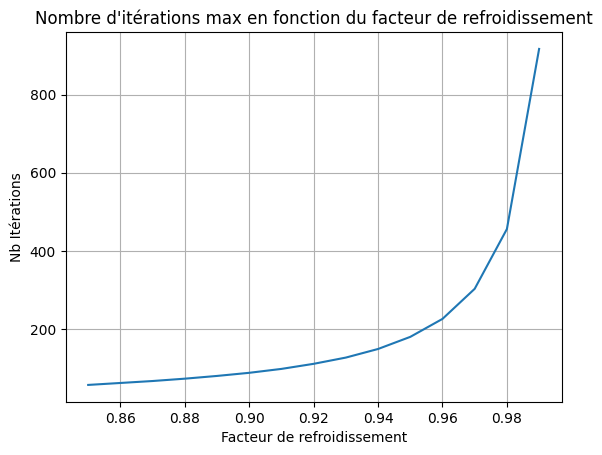

In [ ]:
z5 = [max_iterations_CR[cr] for cr in cooling_rates]

plt.plot(z, z5, label='Nombre d\'itérations maximum')
plt.title('Nombre d\'itérations max en fonction du facteur de refroidissement')
plt.xlabel('Facteur de refroidissement')
plt.ylabel('Nb Itérations')
plt.grid()
plt.show()

     Température    CR  Profit max
0            100  0.85       40257
1            100  0.86       40257
2            100  0.87       40257
3            100  0.88       40257
4            100  0.89       40257
..           ...   ...         ...
130        10000  0.95       40257
131        10000  0.96       40257
132        10000  0.97       40257
133        10000  0.98       40257
134        10000  0.99       40257

[135 rows x 3 columns]
                            OLS Regression Results                            
Dep. Variable:             Profit max   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -66.00
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               1.00
Time:                        16:47:34   Log-Likelihood:                 3051.3
No. Observations:                 135   AIC:                            -6097.
Df 

c:\Users\cerik\OneDrive\Desktop\4A INFO\Projet Knapsack\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


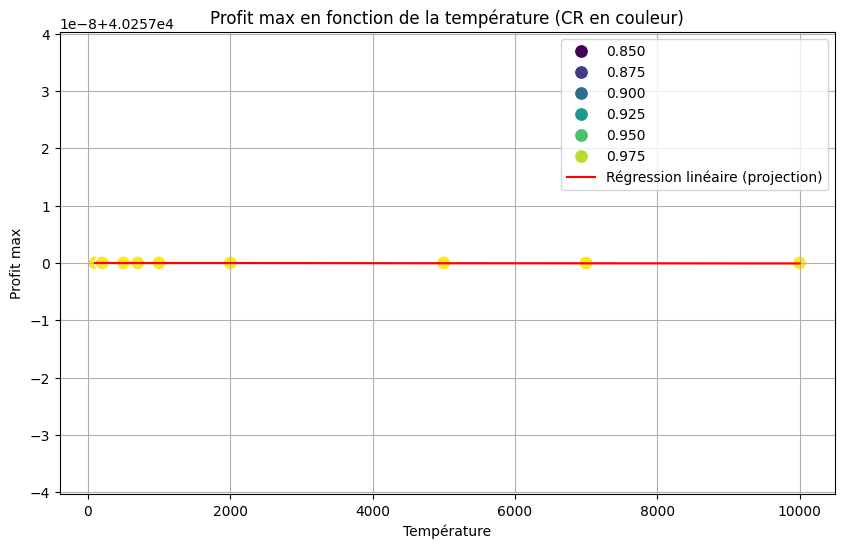

In [313]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

def collecter_donnees_recuit(temp_list, cr_list, n, fichier):
    donnees = []

    for temp in temp_list:
        for cr in cr_list:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule{n}_{fichier}.csv"
            
            if os.path.exists(file_name):
                try:
                    df = pd.read_csv(file_name)
                    if 'Nouveau profit' in df.columns:
                        profit = df['Nouveau profit'].iloc[0]
                        donnees.append({
                            "Température": temp,
                            "CR": cr,
                            "Profit max": profit
                        })
                    else:
                        print(f"'profit_final' manquant dans {file_name}")
                except Exception as e:
                    print(f"Erreur de lecture {file_name} : {e}")
            else:
                print(f"Fichier introuvable : {file_name}")

    return pd.DataFrame(donnees)

data_pi12_n100 = collecter_donnees_recuit(temperatures, cooling_rates, 10000, 12)
print(data_pi12_n100)

def tracer_regression_lineaire(df):
    X = df[["Température", "CR"]]
    y = df["Profit max"]

    X = sm.add_constant(X)

    # Régression linéaire
    model = sm.OLS(y, X).fit()
    print(model.summary())

    # Extraction des coefficients
    a = model.params["Température"]
    b = model.params["CR"]
    c = model.params["const"]

    print(f"L'équation de régression linéaire est : Profit max = {a:.4f} * Température + {b:.4f} * CR + {c:.4f}")

    y_pred = model.predict(X)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x="Température", y="Profit max", hue="CR", palette="viridis", s=100)
    sns.lineplot(x=df["Température"], y=y_pred, color="red", label="Régression linéaire (projection)")
    plt.title("Profit max en fonction de la température (CR en couleur)")
    plt.legend()
    plt.grid()
    plt.show()

tracer_regression_lineaire(data_pi12_n100)


In [314]:
import os
import pandas as pd

def find_optimal_solution(temperatures, cooling_rates, optimal_solution):
    filenames = []
    for temp in temperatures:
        for cr in cooling_rates:
            filename = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"
            if os.path.exists(filename):
                try:
                    df = pd.read_csv(filename)
                    if "Nouvelle solution" in df.columns:
                        if optimal_solution in df["Nouvelle solution"].values:
                            filenames.append(filename)
                except pd.errors.ParserError:
                    print(f"Warning: Could not parse file {filename}. Skipping.")
    return filenames

In [315]:
def find_files_with_profit_and_weight(target_profit, target_weight, dossier="Resultats"):
    filenames = []
    for filename in os.listdir(dossier):
        if filename.startswith("Temp") and filename.endswith("10000_12.csv"):
            full_path = os.path.join(dossier, filename)
            try:
                df = pd.read_csv(full_path)
                if 'Nouveau profit' in df.columns and 'Nouveau Poids' in df.columns:
                    match = (df['Nouveau profit'] == target_profit) & (df['Nouveau Poids'] == target_weight)
                    if any(match):
                        filenames.append(filename)
            except pd.errors.ParserError:
                print(f"Fichier {filename} non retrouve.")
    return filenames


In [316]:
fichier_optimal = find_optimal_solution(temperatures, cooling_rates, best_solution_str)

if len(fichier_optimal) == 0:
    print("Le recuit simulé n'a pas abouti à la solution optimale en termes de choix/répartition d'objets.")
else:
    for f in fichier_optimal:
        print(f)

Le recuit simulé n'a pas abouti à la solution optimale en termes de choix/répartition d'objets.


A éxecuter uniquement si le recuit simulé a pu donner la solution optimale 

In [317]:
found_files = find_files_with_profit_and_weight(target_profit, target_weight)
for f in found_files:
  print(f)

In [ ]:
def analyze_files(found_files):
    temp_counts = {}
    cr_counts = {}

    for file in found_files:
        try:
            df = pd.read_csv(file)

            # Extract temperature and cooling rate from the filename
            parts = file.split("_")
            temp_str = parts[0].split("Temp")[1]
            cr_str = parts[1].split("CR")[1].split("resultats")[0]

            temperature = int(temp_str)
            cooling_rate = float(cr_str)

            # Update counts
            temp_counts[temperature] = temp_counts.get(temperature, 0) + 1
            cr_counts[cooling_rate] = cr_counts.get(cooling_rate, 0) + 1

        except FileNotFoundError:
            print(f"File not found: {file}")
        except (pd.errors.EmptyDataError, pd.errors.ParserError):
            print(f"Error reading file or empty file: {file}")
        except Exception as e:
            print(f"An unexpected error occurred with file {file}: {e}")


    return temp_counts, cr_counts

In [ ]:
temp_dict, cr_dict = analyze_files(found_files)

print("Temperature counts:", temp_dict)
print("Cooling rate counts:", cr_dict)

max_temps = max(temp_dict, key=temp_dict.get)
print("La température optimale est:", max_temps)
max_crs = max(cr_dict, key=cr_dict.get)
print("Le facteur de refroidissement optimal est:", max_crs)

Temperature counts: {700: 8, 1000: 7, 100: 5, 200: 4, 7000: 4, 500: 8, 5000: 3, 10000: 2, 2000: 2}
Cooling rate counts: {0.91: 3, 0.99: 5, 0.98: 3, 0.86: 3, 0.89: 4, 0.96: 4, 0.97: 4, 0.95: 3, 0.87: 1, 0.92: 3, 0.9: 3, 0.85: 2, 0.93: 1, 0.94: 2, 0.88: 2}
La température optimale est: 700
Le facteur de refroidissement optimal est: 0.99


#### Métaheuristique 2 - Génétique

In [166]:
def roulette_selection(population, profits):
    # Calcul du profit total pour la population
    fitness = [calculate_profit(sol, profits) for sol in population]
    total_fitness = sum(fitness)

    # Si la fitness totale est 0, on retourne un choix aléatoire
    if total_fitness == 0:
        return random.choice(population)

    # Sélection d'un parent par roulette
    pick = random.uniform(0, total_fitness)
    current = 0
    for i, sol in enumerate(population):
        current += fitness[i]
        if current > pick:
            return sol
    return population[-1]  # Retourne le dernier si aucune sélection avant


In [167]:
def crossover(nb_items, parent1, parent2, max_capacity, weights):
    point = random.randint(1, nb_items - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]

    # Vérification si les enfants sont valides
    if calculate_weight(child1, weights) > max_capacity:
        child1 = parent1  # Si l'enfant dépasse la capacité, on garde le parent
    if calculate_weight(child2, weights) > max_capacity:
        child2 = parent2  # Idem pour l'autre enfant

    return child1, child2


In [168]:
def mutate(nb_items, max_capacity, weights, solution):
    sol_list = list(solution)
    index = random.randint(0, nb_items - 1)
    sol_list[index] = "1" if sol_list[index] == "0" else "0"

    # Vérification de la validité après mutation
    new_sol = "".join(sol_list)
    if calculate_weight(new_sol, weights) <= max_capacity:
        return new_sol  # Retourner la solution si elle respecte la capacité
    return solution  # Si la mutation rend la solution invalide, on garde l'ancienne solution


In [ ]:
import matplotlib.pyplot as plt

def algo_genetique(
      nb_items: int,
      max_capacity: int,
      weights: list,
      profits: list,
      nbPop: int,
      nbGen: int,
      probaCross: float,
      nbBest: int
    ):

    # Initialisation de la population
    population = [gen_valid_solution(max_capacity, weights, nb_items) for _ in range(nbPop)]
    best_solution = max(population, key=lambda sol: calculate_profit(sol, profits))
    best_profit = calculate_profit(best_solution, profits)

    # Pour le graphique
    evolution_profits = []
    evolution_weights = []

    for generation in range(nbGen):
        new_population = []

        # Sélection et reproduction
        for _ in range(nbPop):
            parent1 = roulette_selection(population, profits)
            parent2 = roulette_selection(population, profits)

            # Croisement ou mutation
            if random.random() < probaCross:
                child1, child2 = crossover(nb_items, parent1, parent2, max_capacity, weights)
            else:
                child1 = mutate(nb_items, max_capacity, weights, parent1)
                child2 = mutate(nb_items, max_capacity, weights, parent2)

            new_population.append(child1)
            new_population.append(child2)

        # Garder les meilleures solutions
        population = sorted(new_population, key=lambda sol: calculate_profit(sol, profits), reverse=True)[:nbPop]

        # Meilleure solution actuelle
        current_best_solution = population[0]
        current_best_profit = calculate_profit(current_best_solution, profits)
        current_best_weight = calculate_weight(current_best_solution, weights)

        # Enregistrer l’évolution
        evolution_profits.append(current_best_profit)
        evolution_weights.append(current_best_weight)

        # Mettre à jour la meilleure globale
        if current_best_profit > best_profit:
            best_solution = current_best_solution
            best_profit = current_best_profit

    # Tracer l'évolution du profit et du poids
    '''plt.figure(figsize=(12, 6))

    # Tracer du profit au fil des itérations
    plt.subplot(1, 2, 1)
    plt.plot(evolution_profits, label='Profit', color='blue')
    plt.title('Évolution du profit au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Profit')
    plt.grid(True)

    # Tracer du poids au fil des itérations
    plt.subplot(1, 2, 2)
    plt.plot(evolution_weights, label='Poids', color='red')
    plt.title('Évolution du poids au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Poids')
    plt.grid(True)

    plt.tight_layout()
    plt.show()'''

    return best_solution, best_profit


In [172]:
nbPop = 10  # Taille de la population
nbGen = 100  # Nombre de générations
probaCross = 0.7  # Probabilité de croisement
nbBest = 2  # Nombre de meilleures solutions conservées

best_solution, best_profit = algo_genetique(nb_items_pi12_n10000, max_capacity_pi12_n10000, weights_pi12_n10000, profits_pi12_n10000, nbPop, nbGen, probaCross, nbBest)
print("Meilleure solution trouvée :", best_solution)
print("Meilleur profit :", best_profit)
print("Poids atteind :", calculate_weight(best_solution, weights_pi12_n1000))

Meilleure solution trouvée : 01010101010101100110110100101000101000101001110101011101000001001000101110111101010110100110011001111011100010100000111000000011000111010101110111101110010011110101101101111011000001000111000010010101011100000101000000100000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

#### Tests

In [355]:
import pandas as pd
import time
import os

def test_algo_genetique(nb_items, max_capacity, weights, profits, nbPop, nbGen, probaCross, nbBest):
                    results = []
                    
                    # Générer une solution initiale valide
                    initial_solution = gen_valid_solution(max_capacity, weights, nb_items)
                    initial_profit = calculate_profit(initial_solution, profits)
                    initial_weight = calculate_weight(initial_solution, weights)

                    # Démarrer le chronomètre
                    start_time = time.time()

                    # Exécuter l'algorithme génétique
                    best_solution, best_profit = algo_genetique(
                        nb_items, max_capacity, weights, profits, nbPop, nbGen, probaCross, nbBest
                    )

                    # Arrêter le chronomètre
                    end_time = time.time()
                    execution_time = end_time - start_time  # Temps en secondes

                    # Calculer le poids et le nombre d'objets de la meilleure solution
                    best_weight = calculate_weight(best_solution, weights)
                    nb_objects = sum(1 for i in range(len(best_solution)) if best_solution[i] == "1")

                    # Enregistrement des résultats
                    results.append({
                        "Solution initiale": initial_solution,
                        "Profit initial": initial_profit,
                        "Poids initial": initial_weight,
                        "NbPop": nbPop,
                        "NbGen": nbGen,
                        "ProbaCross": probaCross,
                        "NbBest": nbBest,
                        "Nouvelle solution": best_solution,
                        "Nouveau profit": best_profit,
                        "Nouveau Poids": best_weight,
                        "Nb objets": nb_objects,
                        "Temps (s)": execution_time
                    })

                    # Convertir en DataFrame et sauvegarder le fichier
                    df = pd.DataFrame(results)
                    return df
                


In [222]:
# Fixer un interval pour les paramètres

nbPop_list = [10, 50, 70, 100]
nbGen_list = [10, 50, 70, 100]
probaCross_list = [0.1, 0.5, 0.9]
nbBest_list = [2, 5]

# Code pour effectuer des tests: attention, ce code prend ~250 minutes pour s'executer
'''for nbPop in nbPop_list:
    for nbGen in nbGen_list:
        for probaCross in probaCross_list:
            for nbBest in nbBest_list:
                print(f"NbPop {nbPop}\nNbGen {nbGen}\nProbaCross {probaCross}\nNbBest {nbBest}")
                test = test_algo_genetique(nb_items_pi12_n10000, max_capacity_pi12_n10000, weights_pi12_n10000, profits_pi12_n10000, nbPop, nbGen, probaCross, nbBest)
                test.to_csv(f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000_12.csv", index=False)
'''


NbPop 10
NbGen 10
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 10
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 10
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 10
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 10
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 10
ProbaCross 0.9
NbBest 5
NbPop 10
NbGen 50
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 50
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 50
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 50
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 50
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 50
ProbaCross 0.9
NbBest 5
NbPop 10
NbGen 70
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 70
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 70
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 70
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 70
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 70
ProbaCross 0.9
NbBest 5
NbPop 10
NbGen 100
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 100
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 100
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 100
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 100
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 100
ProbaCross

In [356]:
def extract_max_profit_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for probaCross in probaCross_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[probaCross] = max_profit

    return max_profits

In [357]:
def extract_min_weight_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for probaCross in probaCross_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[probaCross] = min_weight

    return min_weights


In [358]:
max_profits_probaCross = extract_max_profit_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_probaCross)

{0.1: np.int64(43992), 0.5: np.int64(44733), 0.9: np.int64(43992)}


In [359]:
min_weights_probaCross = extract_min_weight_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_probaCross)

{0.1: np.int64(31216), 0.5: np.int64(31093), 0.9: np.int64(31216)}


In [360]:
def extract_max_profit_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbGen in nbGen_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbGen] = max_profit

    return max_profits


In [361]:
def extract_min_weight_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbGen in nbGen_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbGen] = min_weight

    return min_weights

In [362]:
max_profits_nbGen = extract_max_profit_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbGen)

{10: np.int64(44733), 50: np.int64(43953), 70: np.int64(43992), 100: np.int64(44538)}


In [363]:
min_weights_nbGen = extract_min_weight_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbGen)

{10: np.int64(31216), 50: np.int64(31093), 70: np.int64(31216), 100: np.int64(31216)}


In [364]:
def extract_max_profit_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbBest in nbBest_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for probaCross in probaCross_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbBest] = max_profit

    return max_profits

In [365]:
def extract_min_weight_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbBest in nbBest_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for probaCross in probaCross_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbBest] = min_weight

    return min_weights

In [366]:
max_profits_nbBest = extract_max_profit_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbBest)

{2: np.int64(44538), 5: np.int64(44733)}


In [367]:
min_weights_nbBest = extract_min_weight_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbBest)

{2: np.int64(31093), 5: np.int64(31216)}


In [368]:
def extract_max_profit_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbPop in nbPop_list:
        max_profit = float('-inf')

        for nbGen in nbGen_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbPop] = max_profit

    return max_profits

In [369]:
def extract_min_weight_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbPop in nbPop_list:
        min_weight = float('inf')

        for nbGen in nbGen_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000_12.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbPop] = min_weight

    return min_weights

In [370]:
max_profits_nbPop = extract_max_profit_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbPop)

{10: np.int64(43719), 50: np.int64(43992), 70: np.int64(44226), 100: np.int64(44733)}


In [371]:
min_weights_nbPop = extract_min_weight_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbPop)

{10: np.int64(31216), 50: np.int64(31216), 70: np.int64(31093), 100: np.int64(31216)}


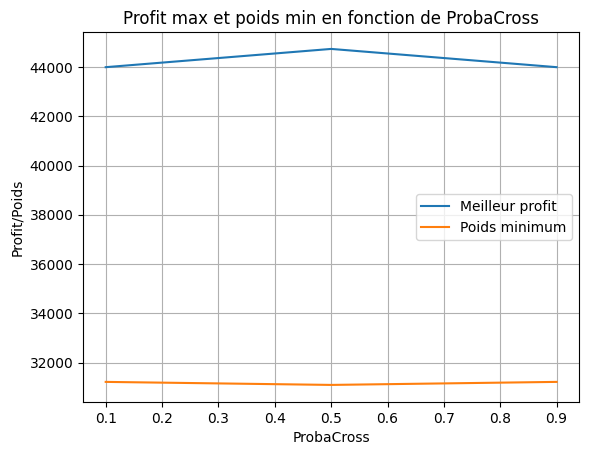

In [372]:
y = probaCross_list
y1 = [max_profits_probaCross[i] for i in y]
y2 = [min_weights_probaCross[i] for i in y]

plt.plot(y, y1, label='Meilleur profit')
plt.plot(y, y2, label='Poids minimum')
plt.xlabel('ProbaCross')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de ProbaCross')
plt.legend()
plt.grid()
plt.show()

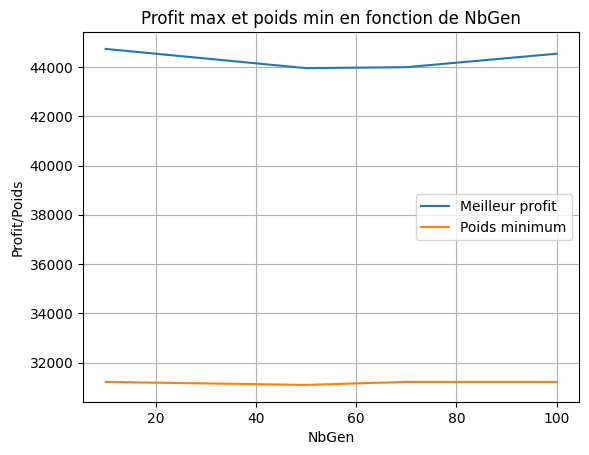

In [242]:
z = nbGen_list
z1 = [max_profits_nbGen[i] for i in z]
z2 = [min_weights_nbGen[i] for i in z]

plt.plot(z, z1, label='Meilleur profit')
plt.plot(z, z2, label='Poids minimum')
plt.xlabel('NbGen')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de NbGen')
plt.legend()
plt.grid()
plt.show()

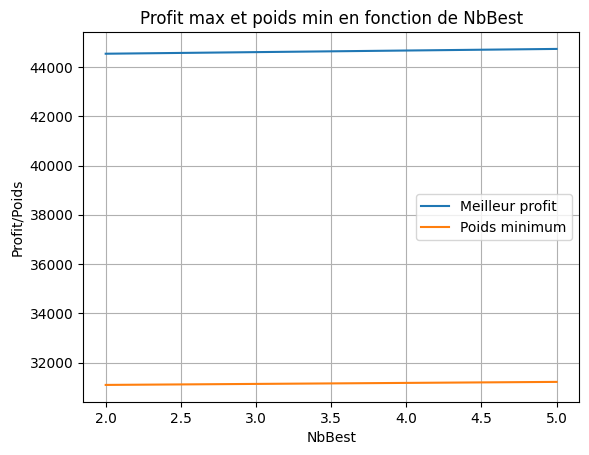

In [243]:
k = nbBest_list
k1 = [max_profits_nbBest[i] for i in k]
k2 = [min_weights_nbBest[i] for i in k]

plt.plot(k, k1, label='Meilleur profit')
plt.plot(k, k2, label='Poids minimum')
plt.xlabel('NbBest')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de NbBest')
plt.legend()
plt.grid()
plt.show()

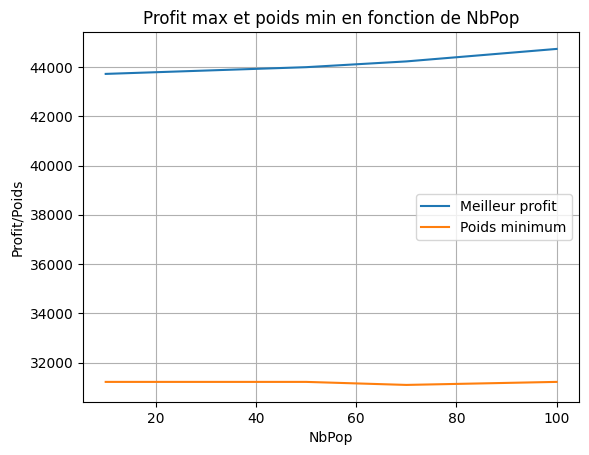

In [244]:
x = nbPop_list
x1 = [max_profits_nbPop[i] for i in x]
x2 = [min_weights_nbPop[i] for i in x]

plt.plot(x, x1, label='Meilleur profit')
plt.plot(x, x2, label='Poids minimum')
plt.xlabel('NbPop')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de NbPop')
plt.legend()
plt.grid()
plt.show()

In [373]:
def find_optimal_solution(nbPop_list, nbGen_list, probaCross_list, nbBest_list, optimal_solution):

    filenames = []
    for nbPop in nbPop_list:
        for nbGen in nbGen_list:
          for probaCross in probaCross_list:
            for nbBest in nbBest_list:
                filename = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000_12.csv"
                if os.path.exists(filename):
                    try:
                        df = pd.read_csv(filename)
                        if optimal_solution in df["Nouvelle solution"].values:
                            filenames.append(filename)
                    except pd.errors.ParserError:
                        print(f"Warning: Could not parse file {filename}. Skipping.")
                else:
                    print(f"Fichier manquant: {filename}")

    return filenames


In [374]:
def find_files_with_profit_and_weight(target_profit, target_weight, dossier="Resultats"):
    filenames = []

    for filename in os.listdir(dossier):
        if filename.startswith("NbPop") and filename.endswith(".csv"):
            filepath = os.path.join(dossier, filename)
            try:
                df = pd.read_csv(filepath)

                if 'Nouveau profit' in df.columns and 'Nouveau Poids' in df.columns:
                    condition = (df['Nouveau profit'] == target_profit) & (df['Nouveau Poids'] == target_weight)
                    if any(condition):
                        filenames.append(filename)
            except Exception as e:
                print(f"Erreur avec le fichier {filename}: {e}")

    return filenames


In [375]:
fichier_optimal = find_optimal_solution(nbPop_list, nbGen_list, probaCross_list, nbBest_list, best_solution_str)
for f in fichier_optimal:
  print(f) #aucun fichier contient la solution optimale en termes de choix d'objets

In [376]:
found_files = find_files_with_profit_and_weight(target_profit, target_weight)
for f in found_files:
  print(f)

A executer uniquement si le resultat precedent n'est pas nul

In [ ]:
def analyze_files(found_files):
    nbPop_counts = {}
    nbGen_counts = {}
    probaCross_counts = {}
    nbBest_counts = {}

    for file in found_files:
      try:
          df = pd.read_csv(file)

          parts = file.split("_")

          pop_str = parts[0].split("NbPop")[1]
          nbPop_counts[int(pop_str)] = nbPop_counts.get(int(pop_str), 0) + 1

          gen_str = parts[1].split("NbGen")[1]
          nbGen_counts[int(gen_str)] = nbGen_counts.get(int(gen_str), 0) + 1

          probaCross_str = parts[2].split("ProbaCross")[1]
          probaCross_counts[float(probaCross_str)] = probaCross_counts.get(float(probaCross_str), 0) + 1

          best_str = parts[3].split("NbBest")[1]
          nbBest_counts[int(best_str)] = nbBest_counts.get(int(best_str), 0) + 1
      except pd.errors.ParserError:
          print(f"Fichier {file} non retrouve.")

    return nbPop_counts, nbGen_counts, probaCross_counts, nbBest_counts

In [199]:
nbPop_dict, nbGen_dict, probaCross_dict, nbBest_dict = analyze_files(found_files)
print(nbPop_dict)
print(nbGen_dict)
print(probaCross_dict)
print(nbBest_dict)

max_nbPop = max(nbPop_dict, key=nbPop_dict.get)
print("Le nombre de population optimal est:", max_nbPop)
max_nbGen = max(nbGen_dict, key=nbGen_dict.get)
print("Le nombre de génération optimal est:", max_nbGen)
max_probaCross = max(probaCross_dict, key=probaCross_dict.get)
print("La probabilité de croisement optimale est:", max_probaCross)
max_nbBest = max(nbBest_dict, key=nbBest_dict.get)
print("Le nombre de meilleures solutions optimal est:", max_nbBest)

{}
{}
{}
{}


ValueError: max() arg is an empty sequence

### Temps

In [ ]:
import glob
import pandas as pd
import os

n_values=[100, 1000, 10000]

def calculer_moyenne_temps_par_n_recuit(n_values):
    # Dictionnaire pour stocker les moyennes pour chaque n
    moyennes_temps = {}

    # Parcourir les valeurs de n (100, 1000, 10000)
    for n in n_values:
        temps_list = []

        file_name = f"Resultats/*resultats_recuit_simule{n}_12.csv"

        # Trouver tous les fichiers correspondant au pattern
        for file in glob.glob(file_name):
                try:
                    df = pd.read_csv(file)
                    # Si la colonne 'Temps (s)' existe dans le fichier
                    if 'Temps (s)' in df.columns:
                        temps_list.append(df['Temps (s)'].mean())
                    else:
                        print(f"La colonne 'Temps (s)' est absente dans {file}.")
                except Exception as e:
                    print(f"Erreur lors de la lecture du fichier {file}: {e}")

        # Calcul de la moyenne pour chaque n
        if temps_list:
            moyennes_temps[n] = sum(temps_list) / len(temps_list)
        else:
            moyennes_temps[n] = None

    return moyennes_temps

moyennes_recuit = calculer_moyenne_temps_par_n_recuit(n_values)
temps_meta_recuit = list(moyennes_recuit.values())
print(f"Moyennes des temps pour chaque n - recuit simule - pi12: {temps_meta_recuit}")
print(f"Moyenne des temps avec le solver: {temps_solver}")

Moyennes des temps pour chaque n: [np.float64(0.6554265711042616), np.float64(0.6568690582557961), np.float64(7.808063185656512)]
Moyenne des temps avec le solver: [0.0072896480560302734, 0.032402992248535156, 6.39429783821106]


In [321]:
import glob
import pandas as pd
import os

n_values=[100, 1000, 10000]

def calculer_moyenne_temps_par_n_gen(n_values):
    # Dictionnaire pour stocker les moyennes pour chaque n
    moyennes_temps = {}

    # Parcourir les valeurs de n (100, 1000, 10000)
    for n in n_values:
        temps_list = []

        file_name = f"Resultats/*_resultats_algo_genetique{n}_12.csv"

        # Trouver tous les fichiers correspondant au pattern
        for file in glob.glob(file_name):
                try:
                    df = pd.read_csv(file)
                    # Si la colonne 'Temps (s)' existe dans le fichier
                    if 'Temps (s)' in df.columns:
                        temps_list.append(df['Temps (s)'].mean())
                    else:
                        print(f"La colonne 'Temps (s)' est absente dans {file}.")
                except Exception as e:
                    print(f"Erreur lors de la lecture du fichier {file}: {e}")

        # Calcul de la moyenne pour chaque n
        if temps_list:
            moyennes_temps[n] = sum(temps_list) / len(temps_list)
        else:
            moyennes_temps[n] = None

    return moyennes_temps

moyennes_gen = calculer_moyenne_temps_par_n_gen(n_values)
temps_meta_gen = list(moyennes_gen.values())

print(f"Moyennes des temps pour chaque n - recuit simule - pi12: {temps_meta_recuit}")
print(f"Moyennes des temps pour chaque n - algo genetique - pi12: {temps_meta_gen}")
print(f"Moyenne des temps avec le solver: {temps_solver}")

Moyennes des temps pour chaque n - recuit simule - pi12: [np.float64(0.6554265711042616), np.float64(0.6568690582557961), np.float64(7.808063185656512)]
Moyennes des temps pour chaque n - algo genetique - pi12: [np.float64(1.3291115959485371), np.float64(15.018545597791672), np.float64(162.69510206828514)]
Moyenne des temps avec le solver: [0.0072896480560302734, 0.032402992248535156, 6.39429783821106]


In [294]:
!pip install -q scipy

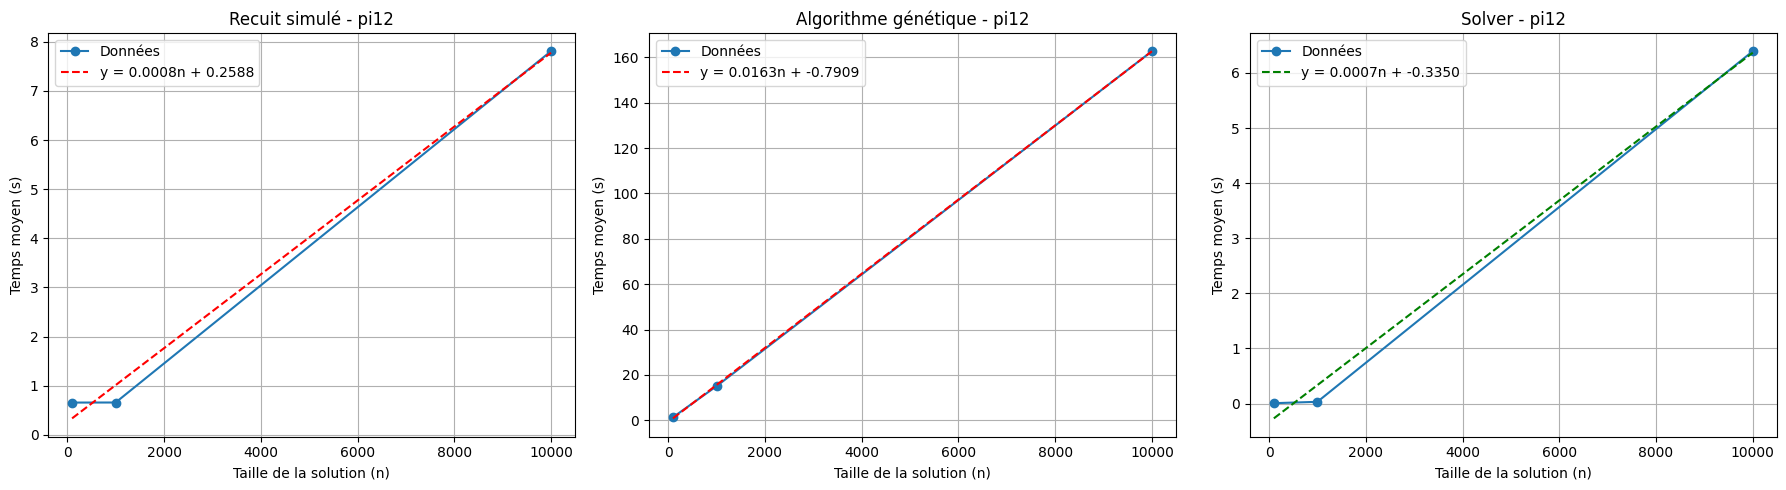

In [320]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Régression linéaire pour recuit simulé
slope_meta1, intercept_meta1, _, _, _ = linregress(n_values, temps_meta_recuit)
line_meta1 = [slope_meta1 * n + intercept_meta1 for n in n_values]
eq_meta1 = f"y = {slope_meta1:.4f}n + {intercept_meta1:.4f}"

# Régression linéaire pour algo génétique
slope_meta2, intercept_meta2, _, _, _ = linregress(n_values, temps_meta_gen)
line_meta2 = [slope_meta2 * n + intercept_meta2 for n in n_values]
eq_meta2 = f"y = {slope_meta2:.4f}n + {intercept_meta2:.4f}"

# Régression linéaire pour solver
slope_solver, intercept_solver, _, _, _ = linregress(n_values, temps_solver)
line_solver = [slope_solver * n + intercept_solver for n in n_values]
eq_solver = f"y = {slope_solver:.4f}n + {intercept_solver:.4f}"

# Création des subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Subplot 1 : Recuit simulé
axs[0].plot(n_values, temps_meta_recuit, 'o-', label="Données")
axs[0].plot(n_values, line_meta1, 'r--', label=eq_meta1)
axs[0].set_title("Recuit simulé - pi12")
axs[0].set_xlabel("Taille de la solution (n)")
axs[0].set_ylabel("Temps moyen (s)")
axs[0].legend()
axs[0].grid()

# Subplot 2 : Algorithme génétique
axs[1].plot(n_values, temps_meta_gen, 'o-', label="Données")
axs[1].plot(n_values, line_meta2, 'r--', label=eq_meta2)
axs[1].set_title("Algorithme génétique - pi12")
axs[1].set_xlabel("Taille de la solution (n)")
axs[1].set_ylabel("Temps moyen (s)")
axs[1].legend()
axs[1].grid()

# Subplot 3 : Solver
axs[2].plot(n_values, temps_solver, 'o-', label="Données")
axs[2].plot(n_values, line_solver, 'g--', label=eq_solver)
axs[2].set_title("Solver - pi12")
axs[2].set_xlabel("Taille de la solution (n)")
axs[2].set_ylabel("Temps moyen (s)")
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()
